<img src="../input/head.png" alt="header">

# Part I: Exploratory Data Analysis and Feature Engineering

### Problem

#### Context
Blueberries are perennial flowering plants with blue or purple berries. They are classified in the section Cyanococcus within the genus Vaccinium. Vaccinium also includes cranberries, bilberries, huckleberries, and Madeira blueberries. Commercial blueberries—both wild (lowbush) and cultivated (highbush)—are all native to North America. The highbush varieties were introduced into Europe during the 1930s.

Blueberries are usually prostrate shrubs that can vary in size from 10 centimeters (4 inches) to 4 meters (13 feet) in height. In the commercial production of blueberries, the species with small, pea-size berries growing on low-level bushes are known as "lowbush blueberries" (synonymous with "wild"), while the species with larger berries growing on taller, cultivated bushes are known as "highbush blueberries". Canada is the leading producer of lowbush blueberries, while the United States produces some 40% of the world s supply of highbush blueberries.

#### Content
"The dataset used for predictive modeling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agroecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches."

#### Dataset Description
| Features | Unit | Description |
| --- | --- | --- |
| Clonesize | m2 | The average blueberry clone size in the field |
| Honeybee | bees/m2/min | Honeybee density in the field |
| Bumbles | bees/m2/min | Bumblebee density in the field |
| Andrena | bees/m2/min | Andrena bee density in the field |
| Osmia | bees/m2/min | Osmia bee density in the field |
| MaxOfUpperTRange | ℃ | The highest record of the upper band daily air temperature during the bloom season |
| MinOfUpperTRange | ℃ | The lowest record of the upper band daily air temperature |
| AverageOfUpperTRange | ℃ | The average of the upper band daily air temperature |
| MaxOfLowerTRange | ℃ | The highest record of the lower band daily air temperature |
| MinOfLowerTRange | ℃ | The lowest record of the lower band daily air temperature |
| AverageOfLowerTRange | ℃ | The average of the lower band daily air temperature |
| RainingDays | Day | The total number of days during the bloom season, each of which has precipitation larger than zero |
| AverageRainingDays | Day | The average of raining days of the entire bloom season |
| fruitset | - | - |
| fruitmass | - | - |
| seeds | - | - |

### Getting started

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
rs=17

#### Data sourcing

In [2]:
# can omit this segment when using directly inside kaggle environment
!kaggle competitions download -c playground-series-s3e14 -p "../input" -q

import zipfile
with zipfile.ZipFile("../input/playground-series-s3e14.zip", 'r') as data:
    data.printdir()
    data.extractall("../input/playground-series-s3e14")

File Name                                             Modified             Size
sample_submission.csv                          2023-04-28 13:37:28       152919
test.csv                                       2023-04-28 13:37:28      1071927
train.csv                                      2023-04-28 13:37:28      1763013


#### Data import

In [3]:
# data
train = pd.read_csv("../input/playground-series-s3e14/train.csv")
test = pd.read_csv("../input/playground-series-s3e14/test.csv")

#### Basic analysis

In [4]:
print(f'Training data: {train.shape}, Testing data: {test.shape}')
print(f'Test fraction: {test.shape[0]*100/(train.shape[0]+test.shape[0])}%')

Training data: (15289, 18), Testing data: (10194, 17)
Test fraction: 40.00313934780049%


In [5]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [7]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [8]:
test.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,20385.500000,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,2942.898656,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,15289.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,17837.250000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,20385.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,22933.750000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,25482.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

> <div class="alert alert-block alert-info">
<b>Insight:</b> 16 continuous features excluding one Target and one ID column.</div>

### Statistical exploratory data analysis on datasets

#### Distributions

In [10]:
X, y = train.iloc[:,1:-1], train.iloc[:,-1]
X_test = test.iloc[:, 1:]
features = X.columns

In [11]:
X.shape, y.shape, X_test.shape

((15289, 16), (15289,), (10194, 16))

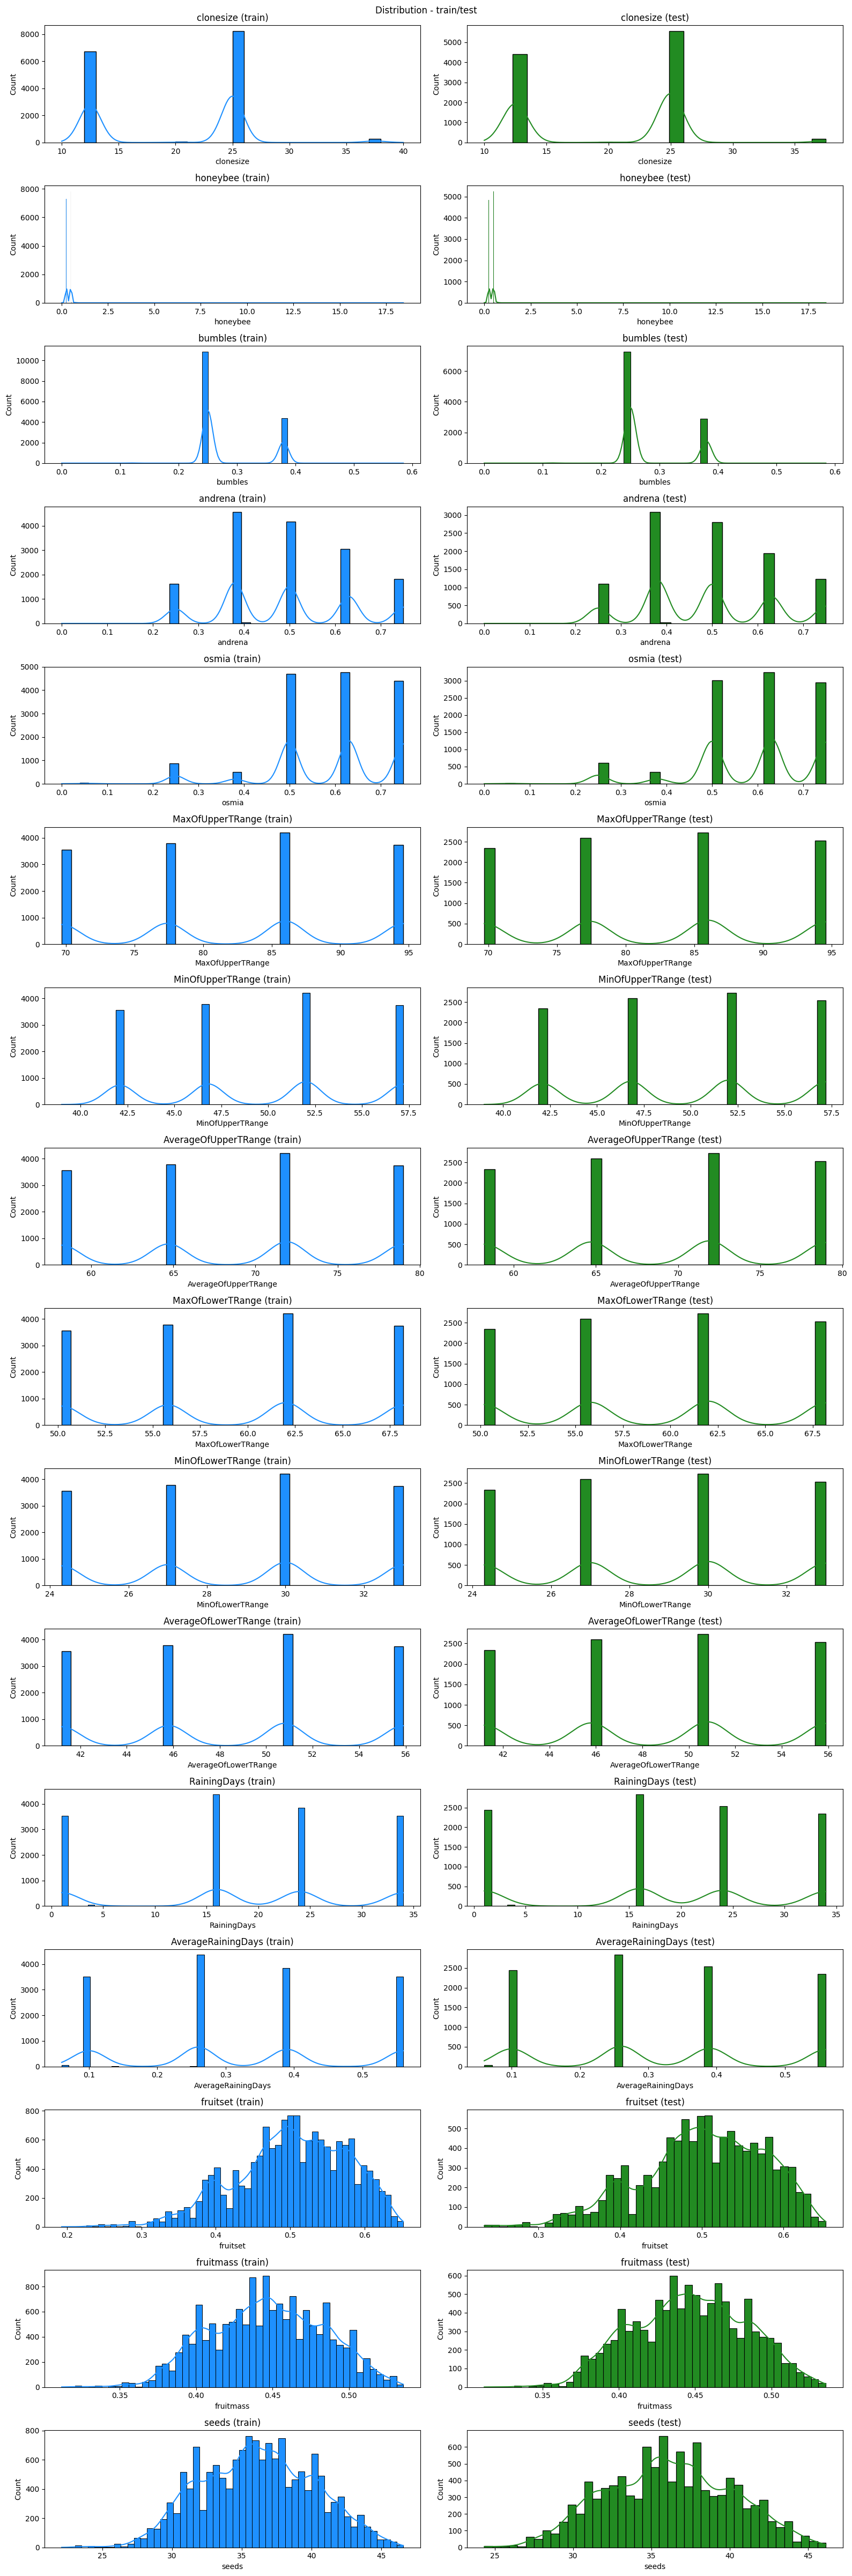

In [12]:
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(16, 48))

for i, f in enumerate(features):
    sns.histplot(X[f], ax=axes[i, 0], color="dodgerblue", alpha=1, kde=True)
    axes[i, 0].set_title(f + " (train)")
    sns.histplot(X_test[f], ax=axes[i, 1], color="forestgreen", alpha=1, kde=True)
    axes[i, 1].set_title(f + " (test)")

fig.tight_layout()
plt.suptitle("Distribution - train/test", y=1.0)
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> Distribution of features with the train and test set is almost identical.</div>

#### Box plots

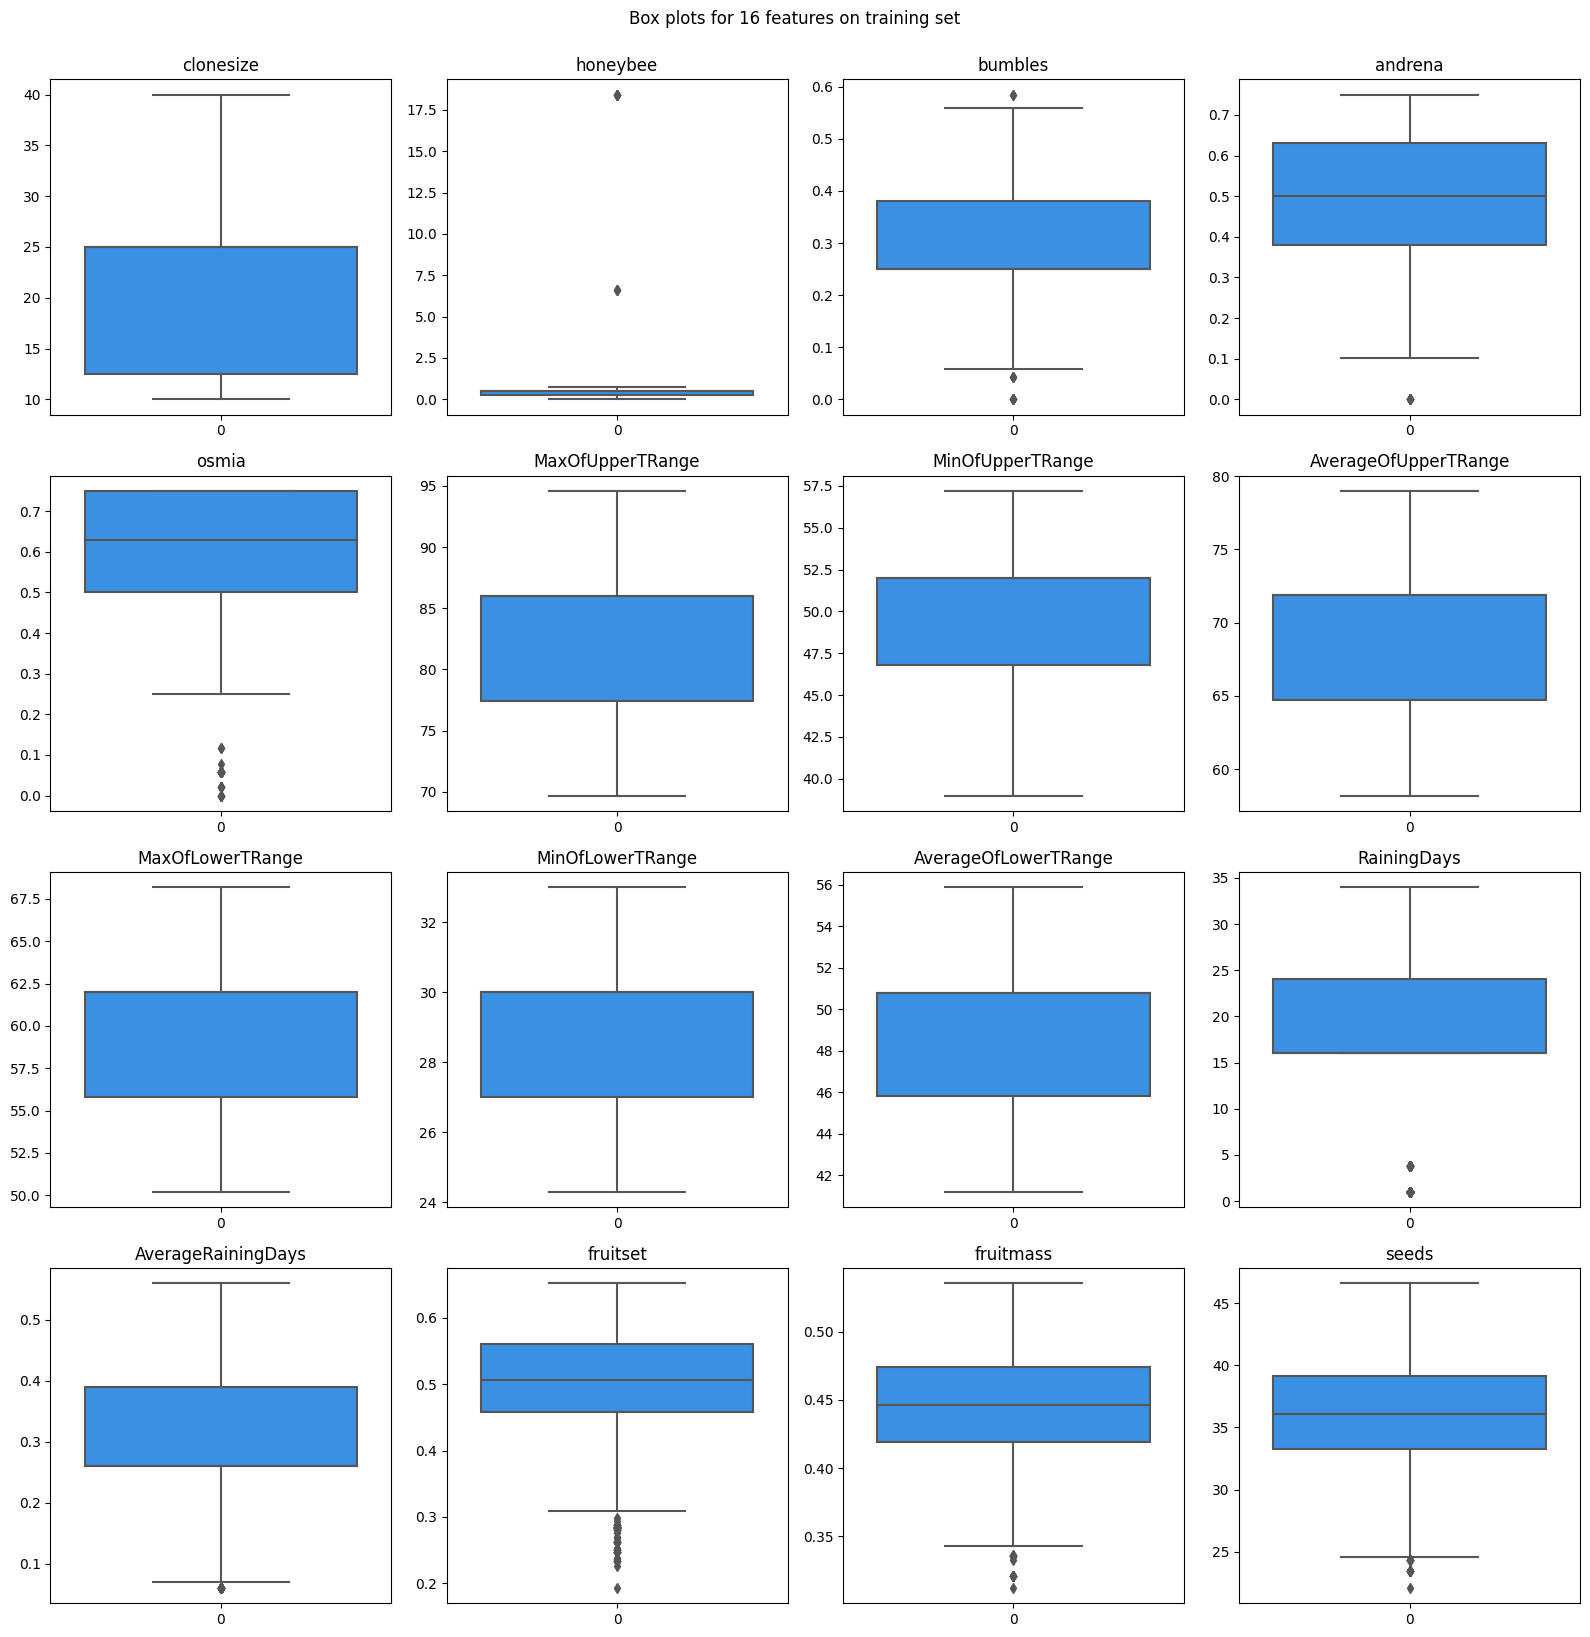

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.boxplot(X[f], ax=axes[i], color="dodgerblue")
    axes[i].set_title(f)
    
fig.tight_layout()
fig.suptitle("Box plots for 16 features on training set", y=1.02)
plt.show()

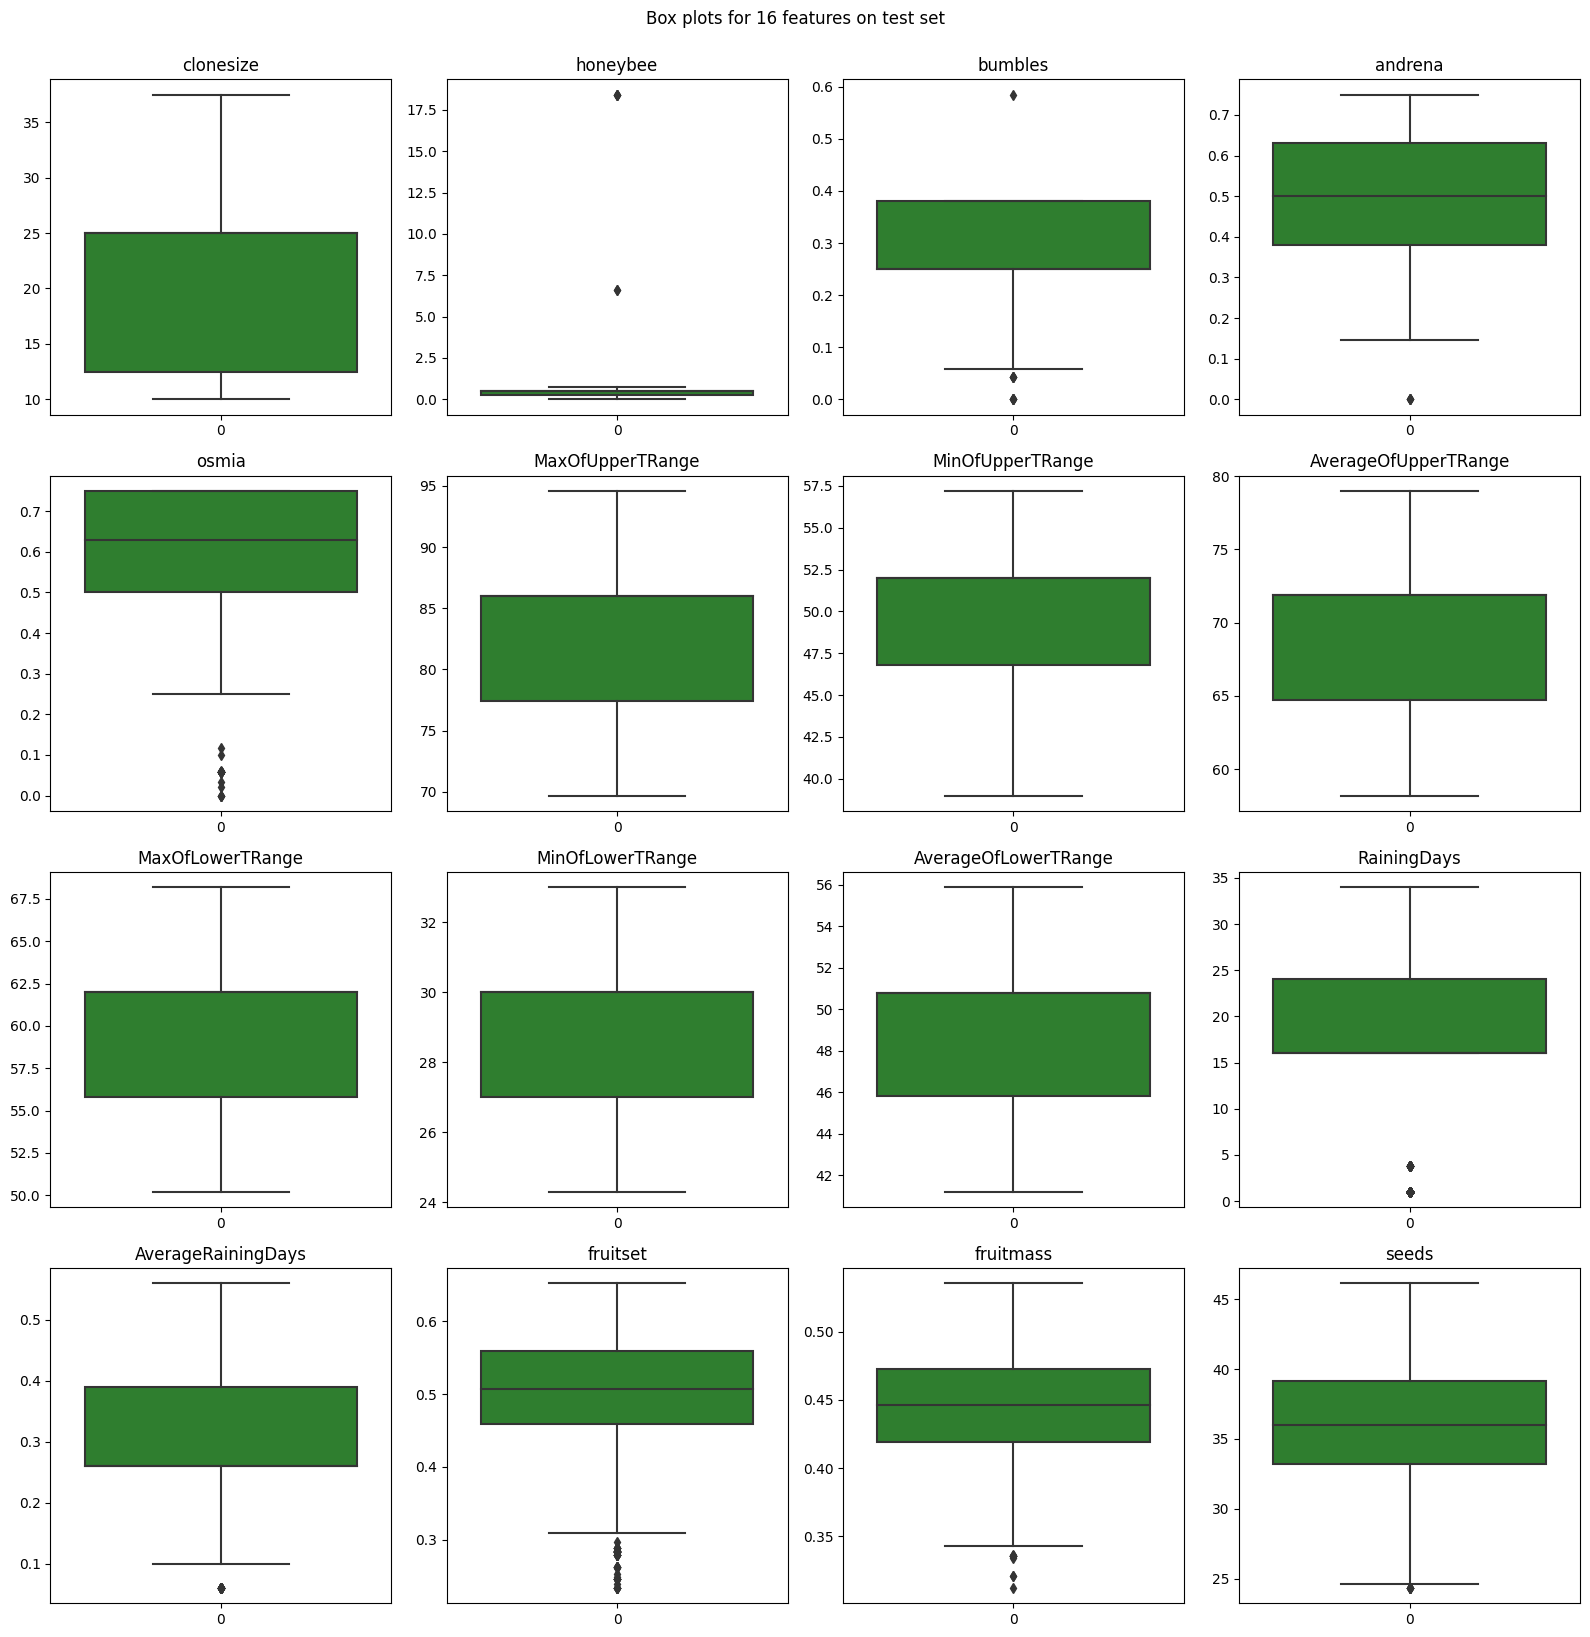

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.boxplot(X_test[f], ax=axes[i], color="forestgreen")
    axes[i].set_title(f)
    
fig.tight_layout()
plt.suptitle("Box plots for 16 features on test set", y=1.02)
plt.show()

#### Violin plots

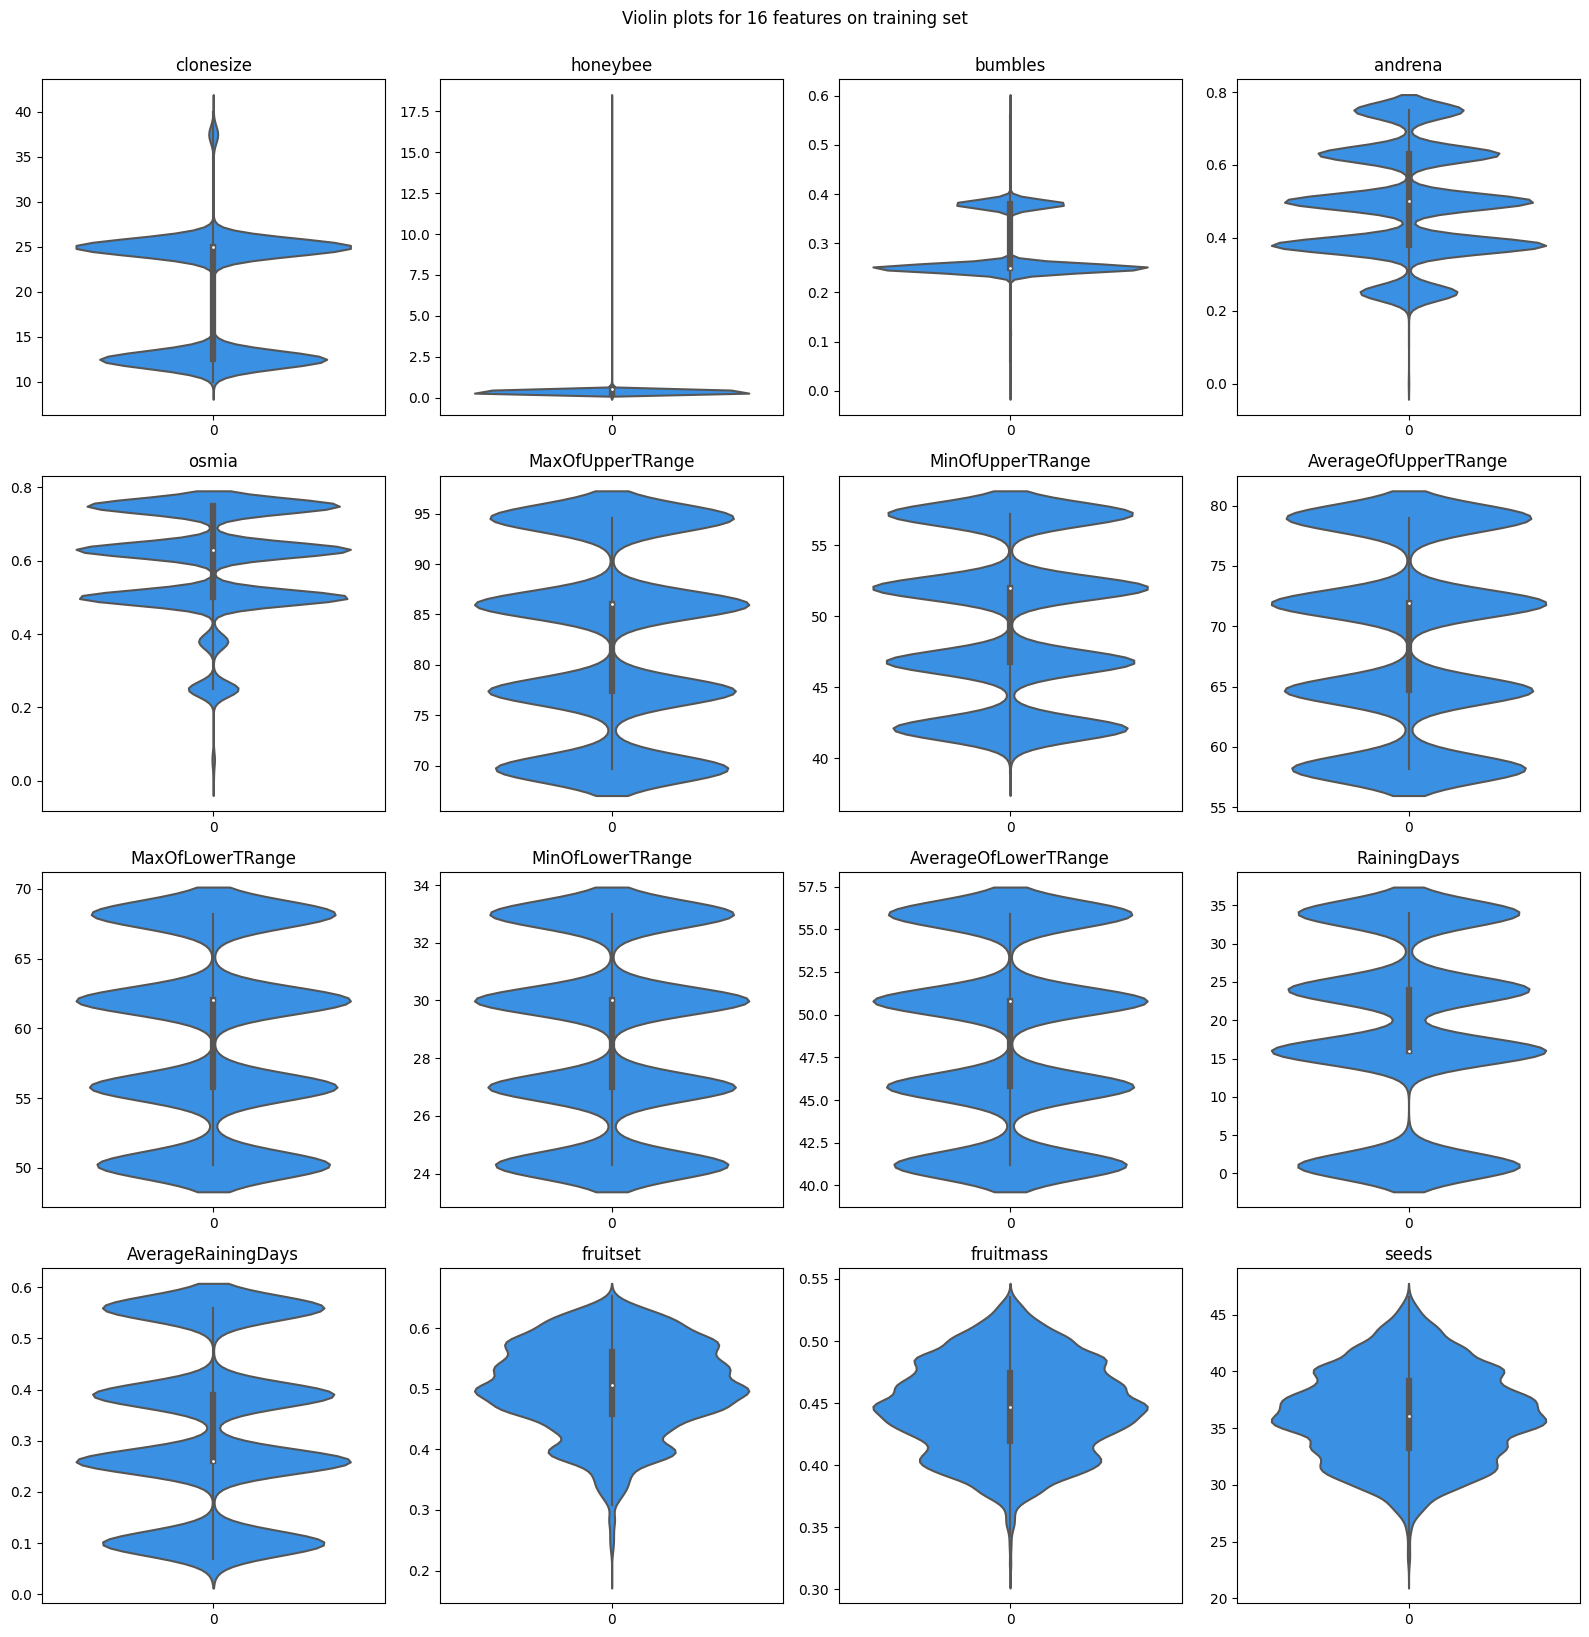

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.violinplot(X[f], ax=axes[i], color="dodgerblue")
    axes[i].set_title(f)
    
fig.tight_layout()
plt.suptitle("Violin plots for 16 features on training set", y=1.02)
plt.show()

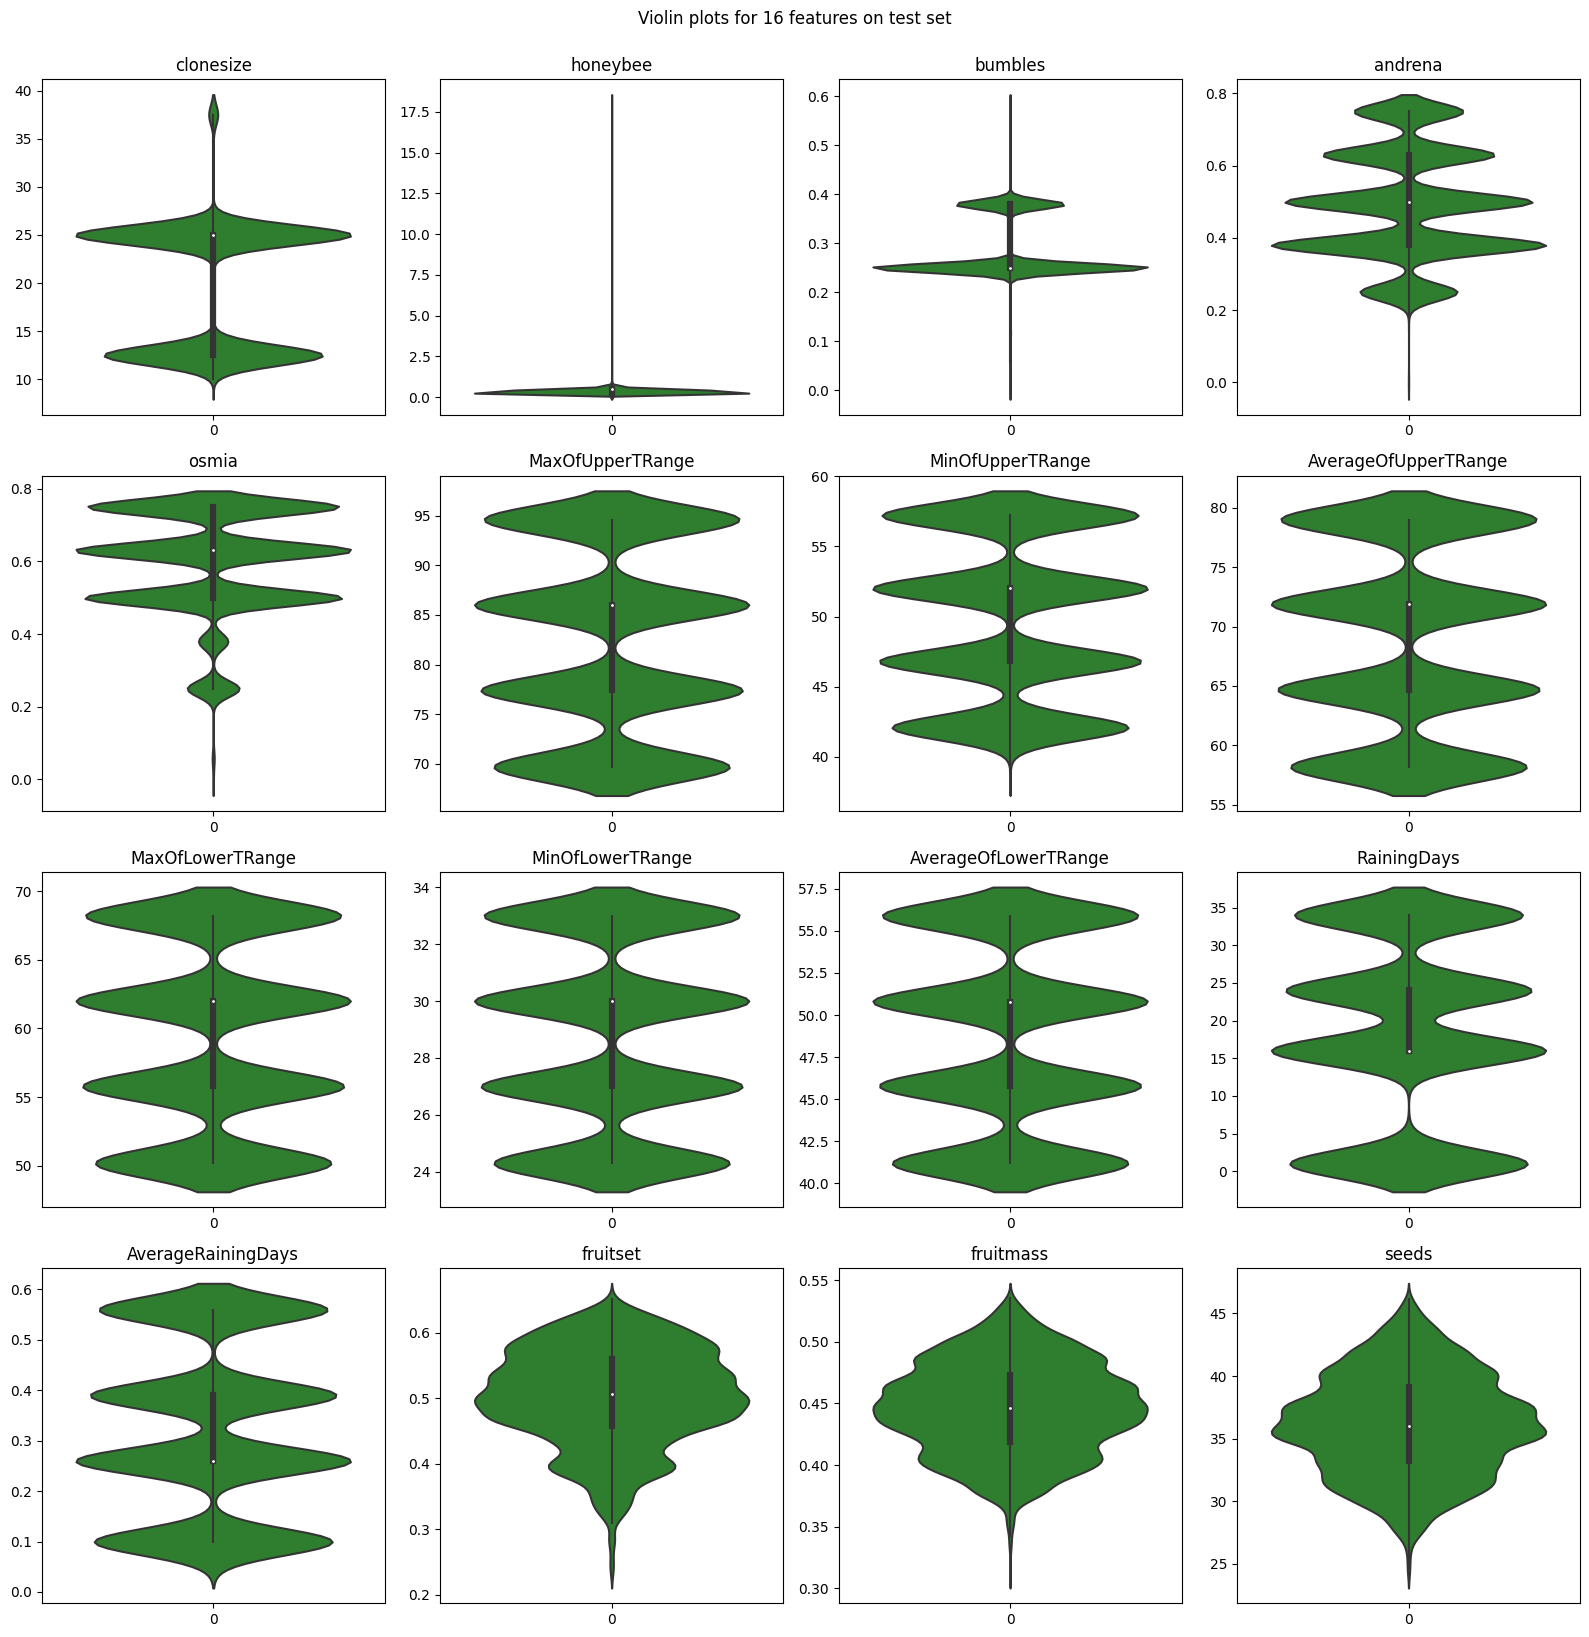

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.violinplot(X_test[f], ax=axes[i], color="forestgreen")
    axes[i].set_title(f)
    
fig.tight_layout()
plt.suptitle("Violin plots for 16 features on test set", y=1.02)
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> Both train and test set have outliers.</div>

#### Density plots w.r.t our target

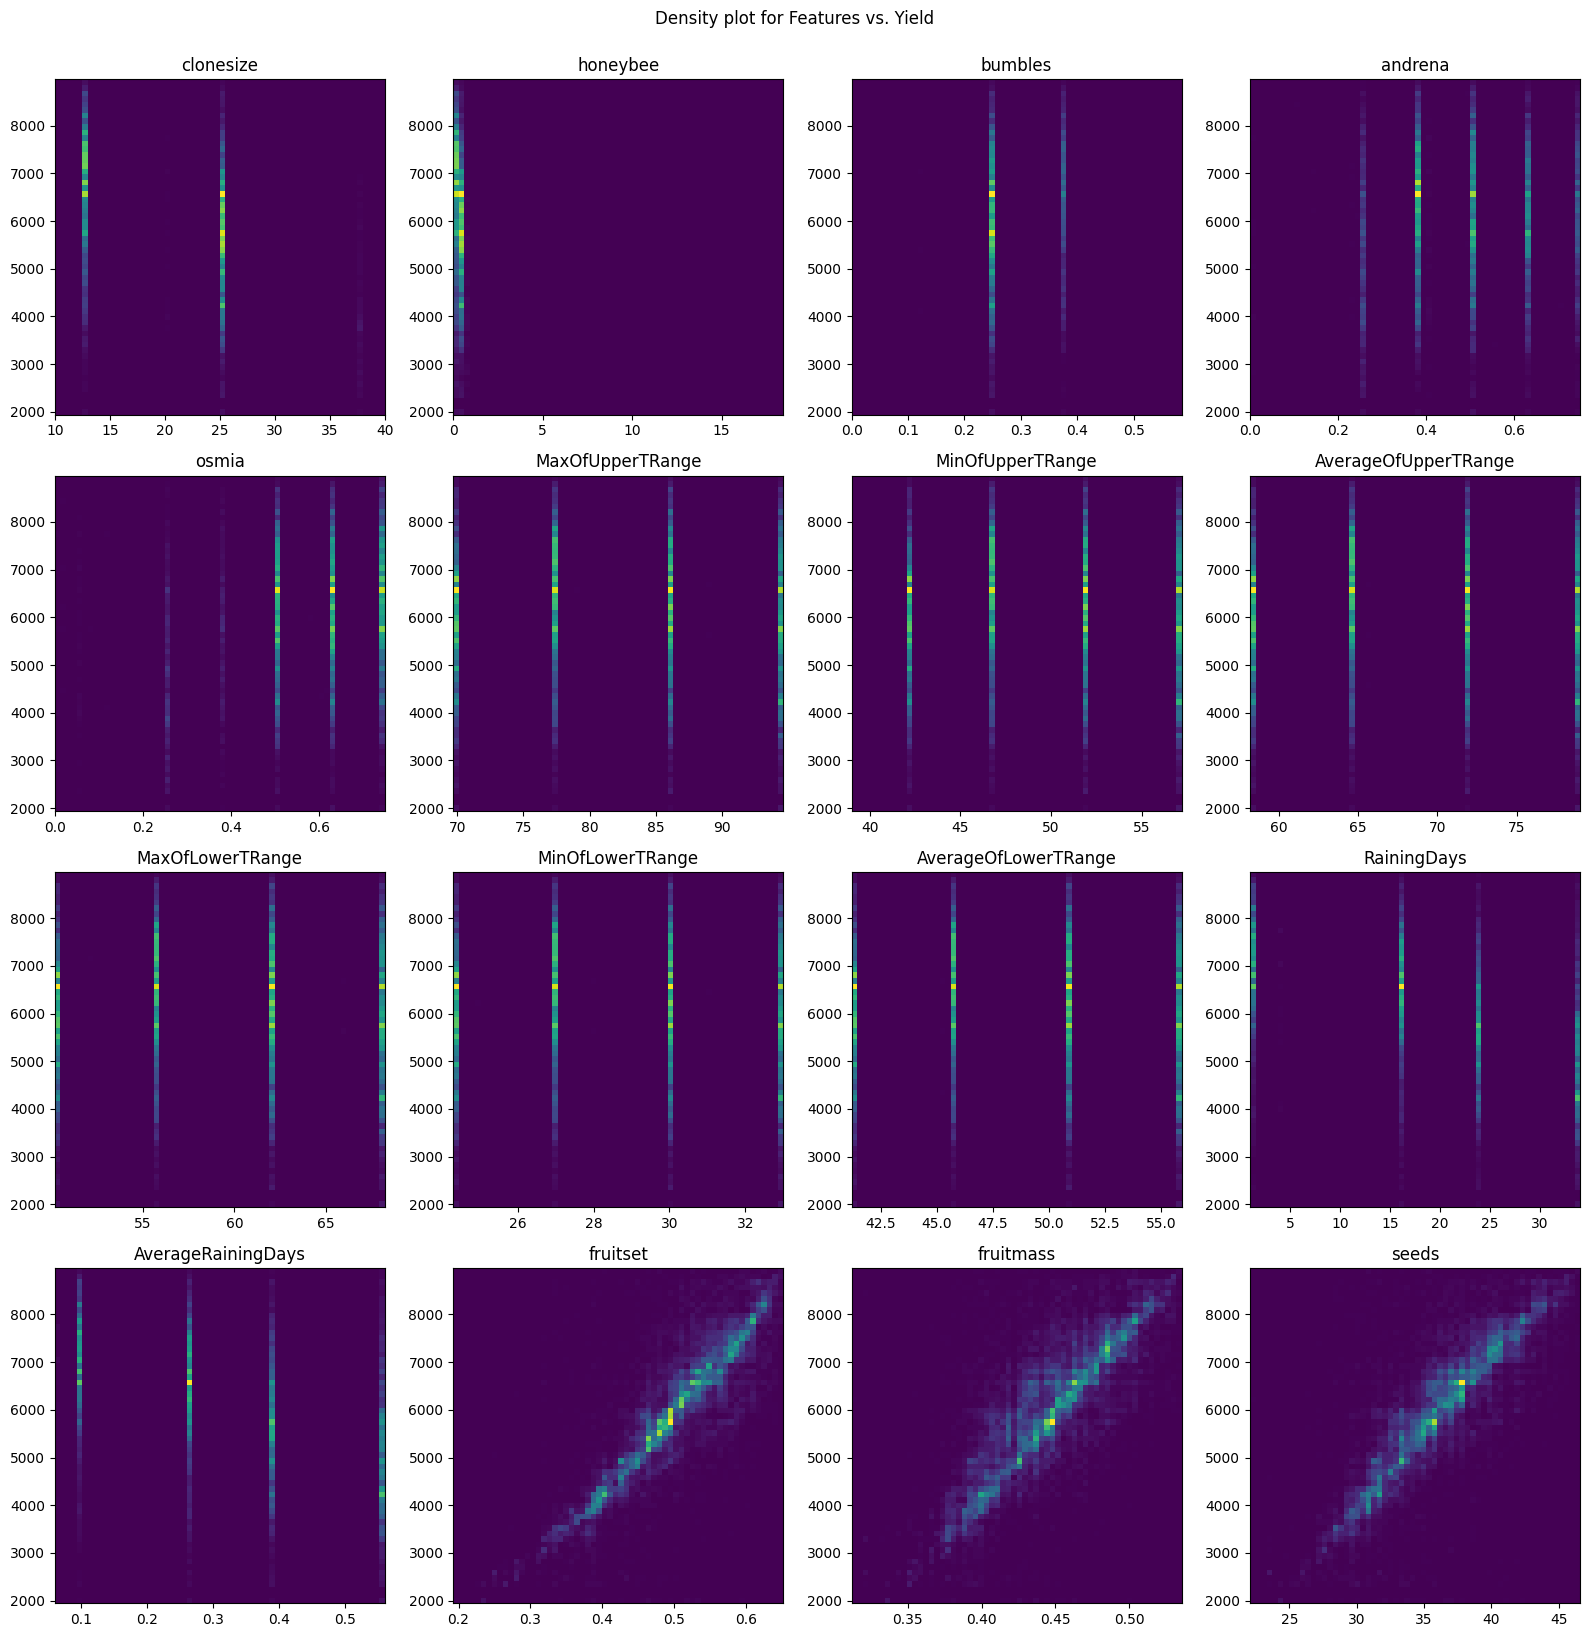

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, f in enumerate(features):
    ax = axes[i // 4, i % 4]
    ax.hist2d(x=X[f], y=y, bins=(60, 60), cmap=plt.cm.viridis)
    ax.set_title(f)

fig.tight_layout()
plt.suptitle("Density plot for Features vs. Yield", y=1.02)
plt.show()

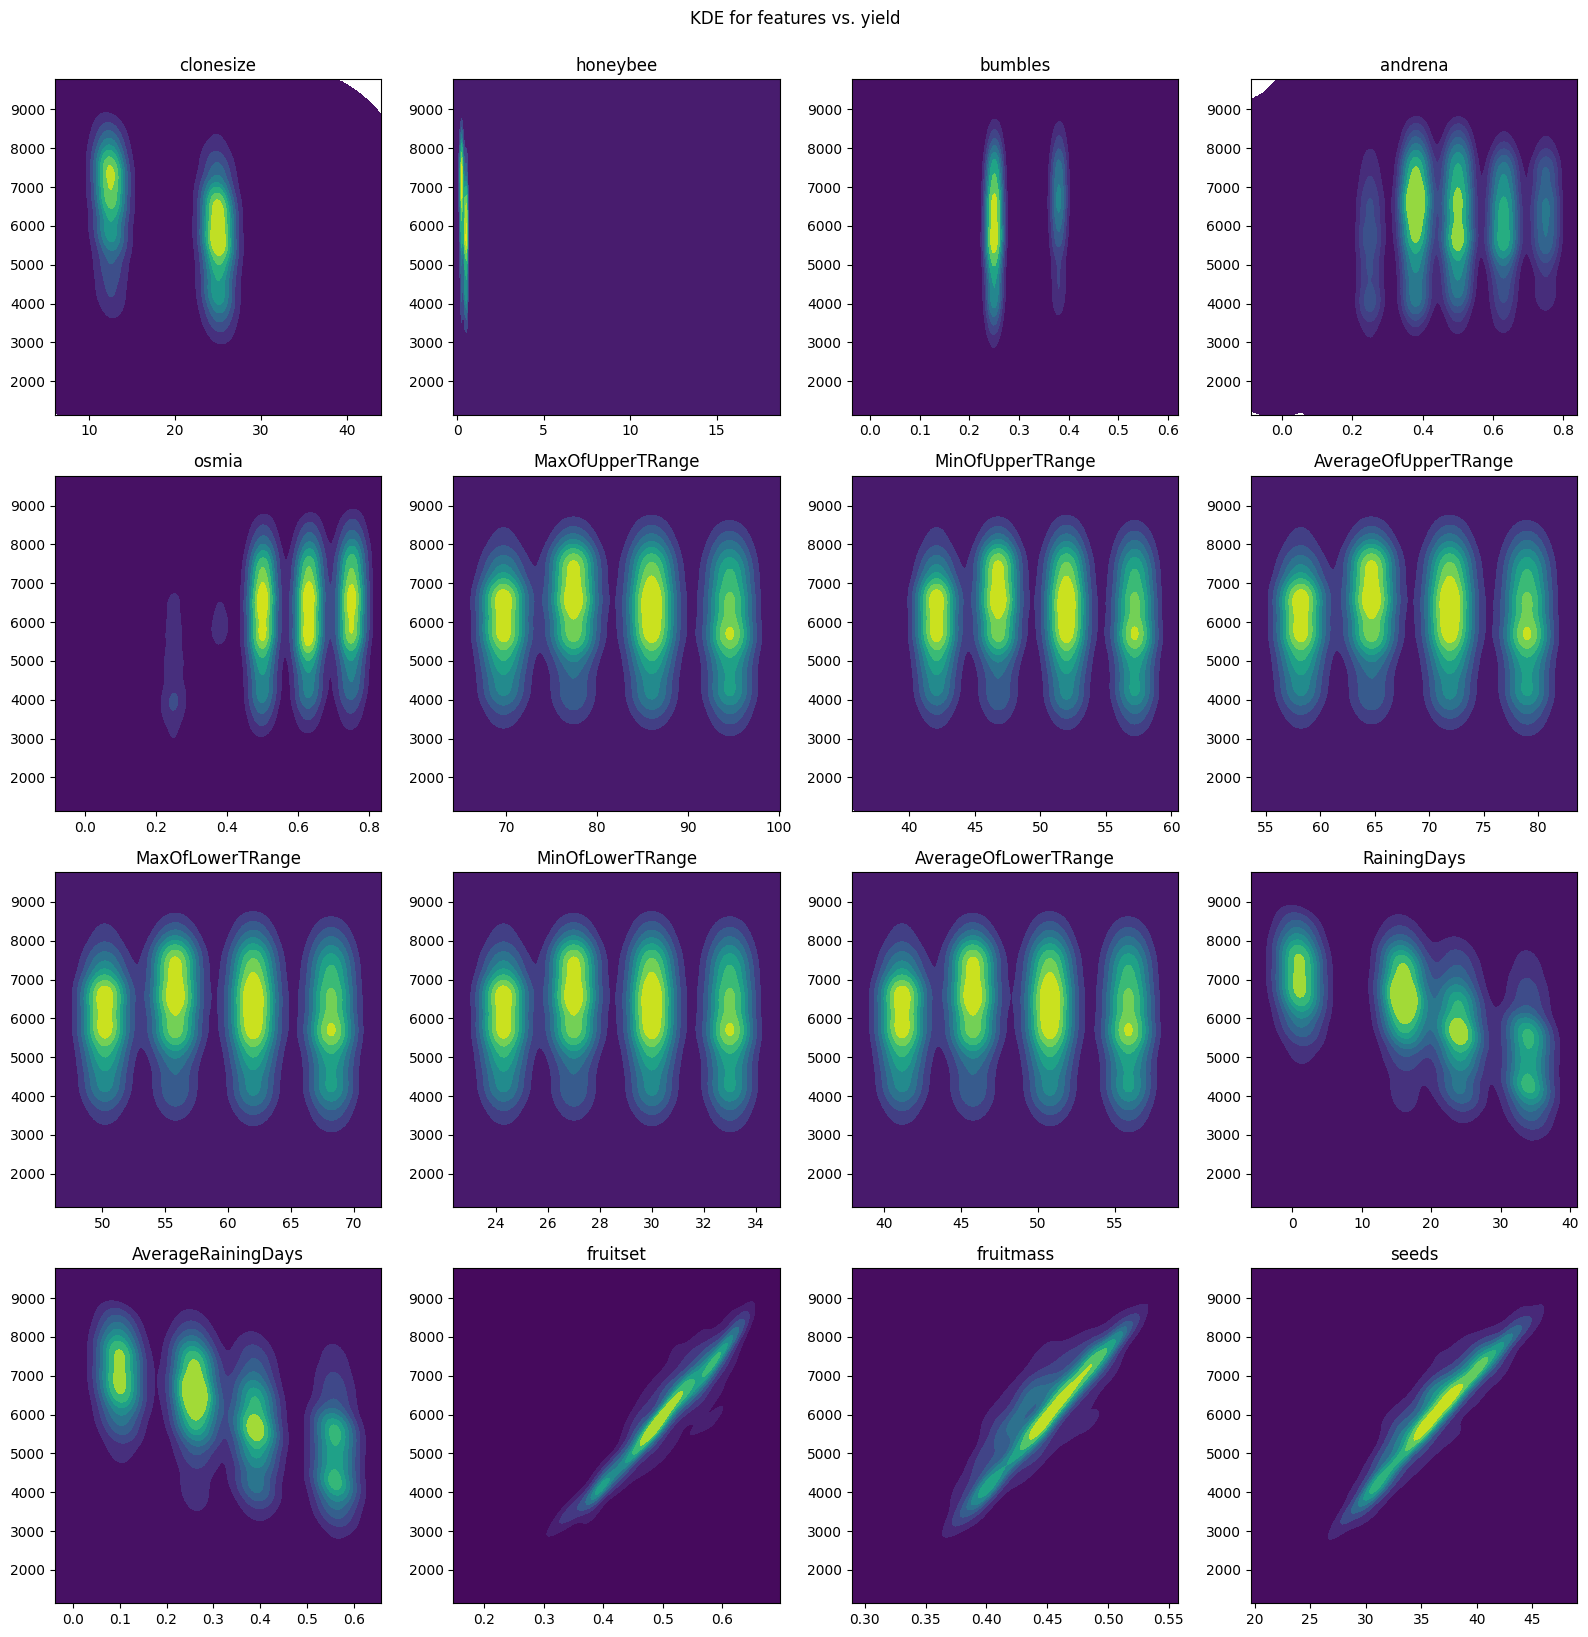

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.kdeplot(x=X[f], y=y, ax=axes[i], cmap=plt.cm.viridis, fill=True, thresh=0)
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.tight_layout()
plt.suptitle("KDE for features vs. yield", y=1.02)
plt.show()

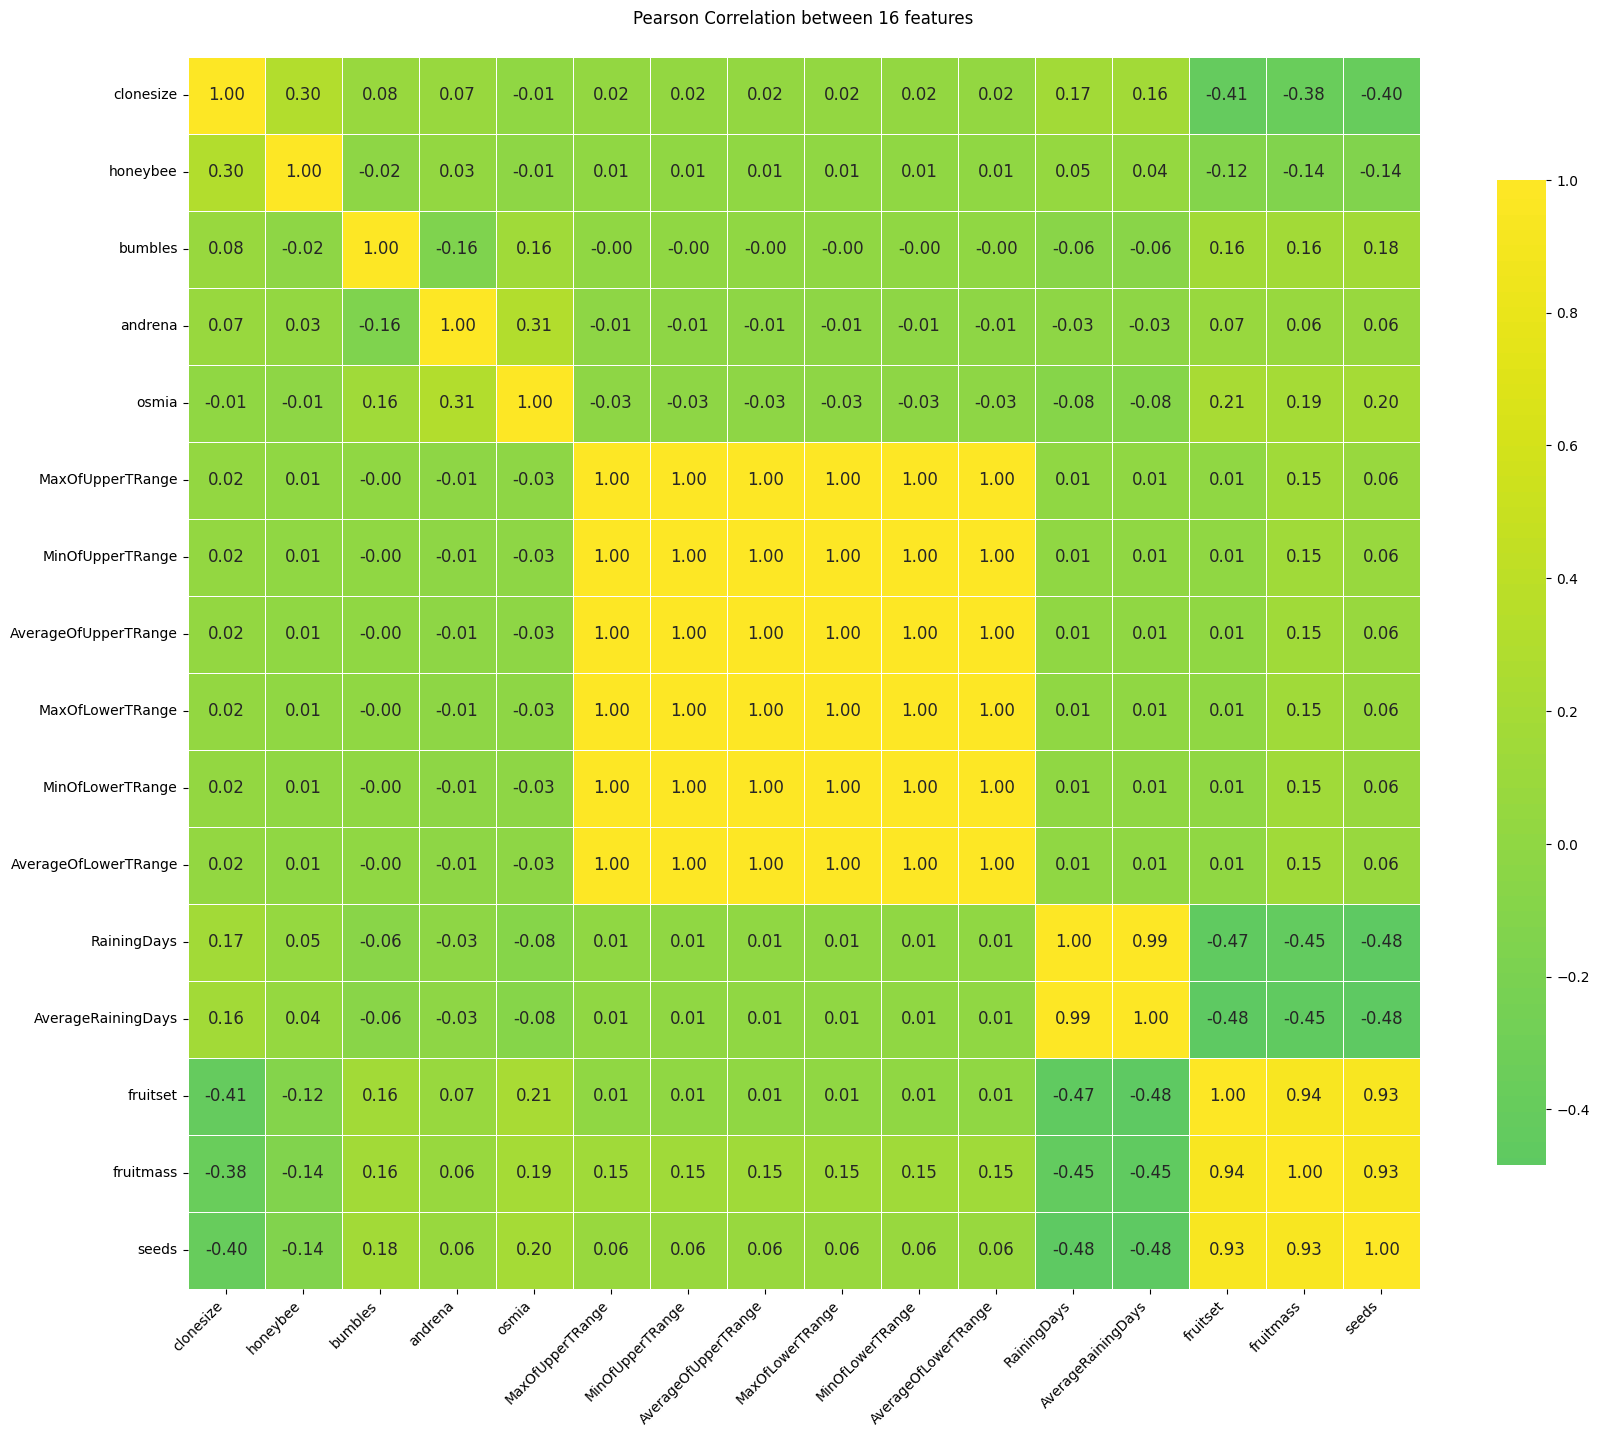

In [19]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cmap=plt.cm.viridis, center=-2, square=True, annot=True, annot_kws={"fontsize":12}, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Pearson Correlation between 16 features", y=1.02)
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> Some of the features are highly correlated with each other which will negatively impact the model if not get rid off.</div>

#### Understanding correlated features

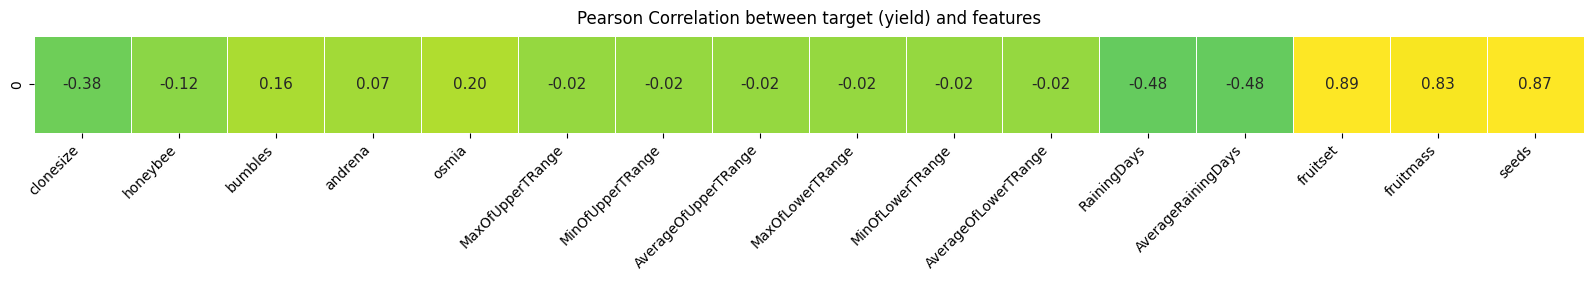

In [20]:
corr = X.corrwith(y)
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(pd.DataFrame(corr).T, cmap=plt.cm.viridis, center=-2, square=True, annot=True, annot_kws={"fontsize":11}, fmt='.2f', linewidths=0.5, cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Pearson Correlation between target (yield) and features", y=1.04)
plt.show()

#### Defining IQR

In [21]:
l = 0.15
h = 0.85

In [22]:
def get_iqr_lh(series, l, h):
    q1 = series.quantile(l)
    q3 = series.quantile(h)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)

#### Understanding outliers

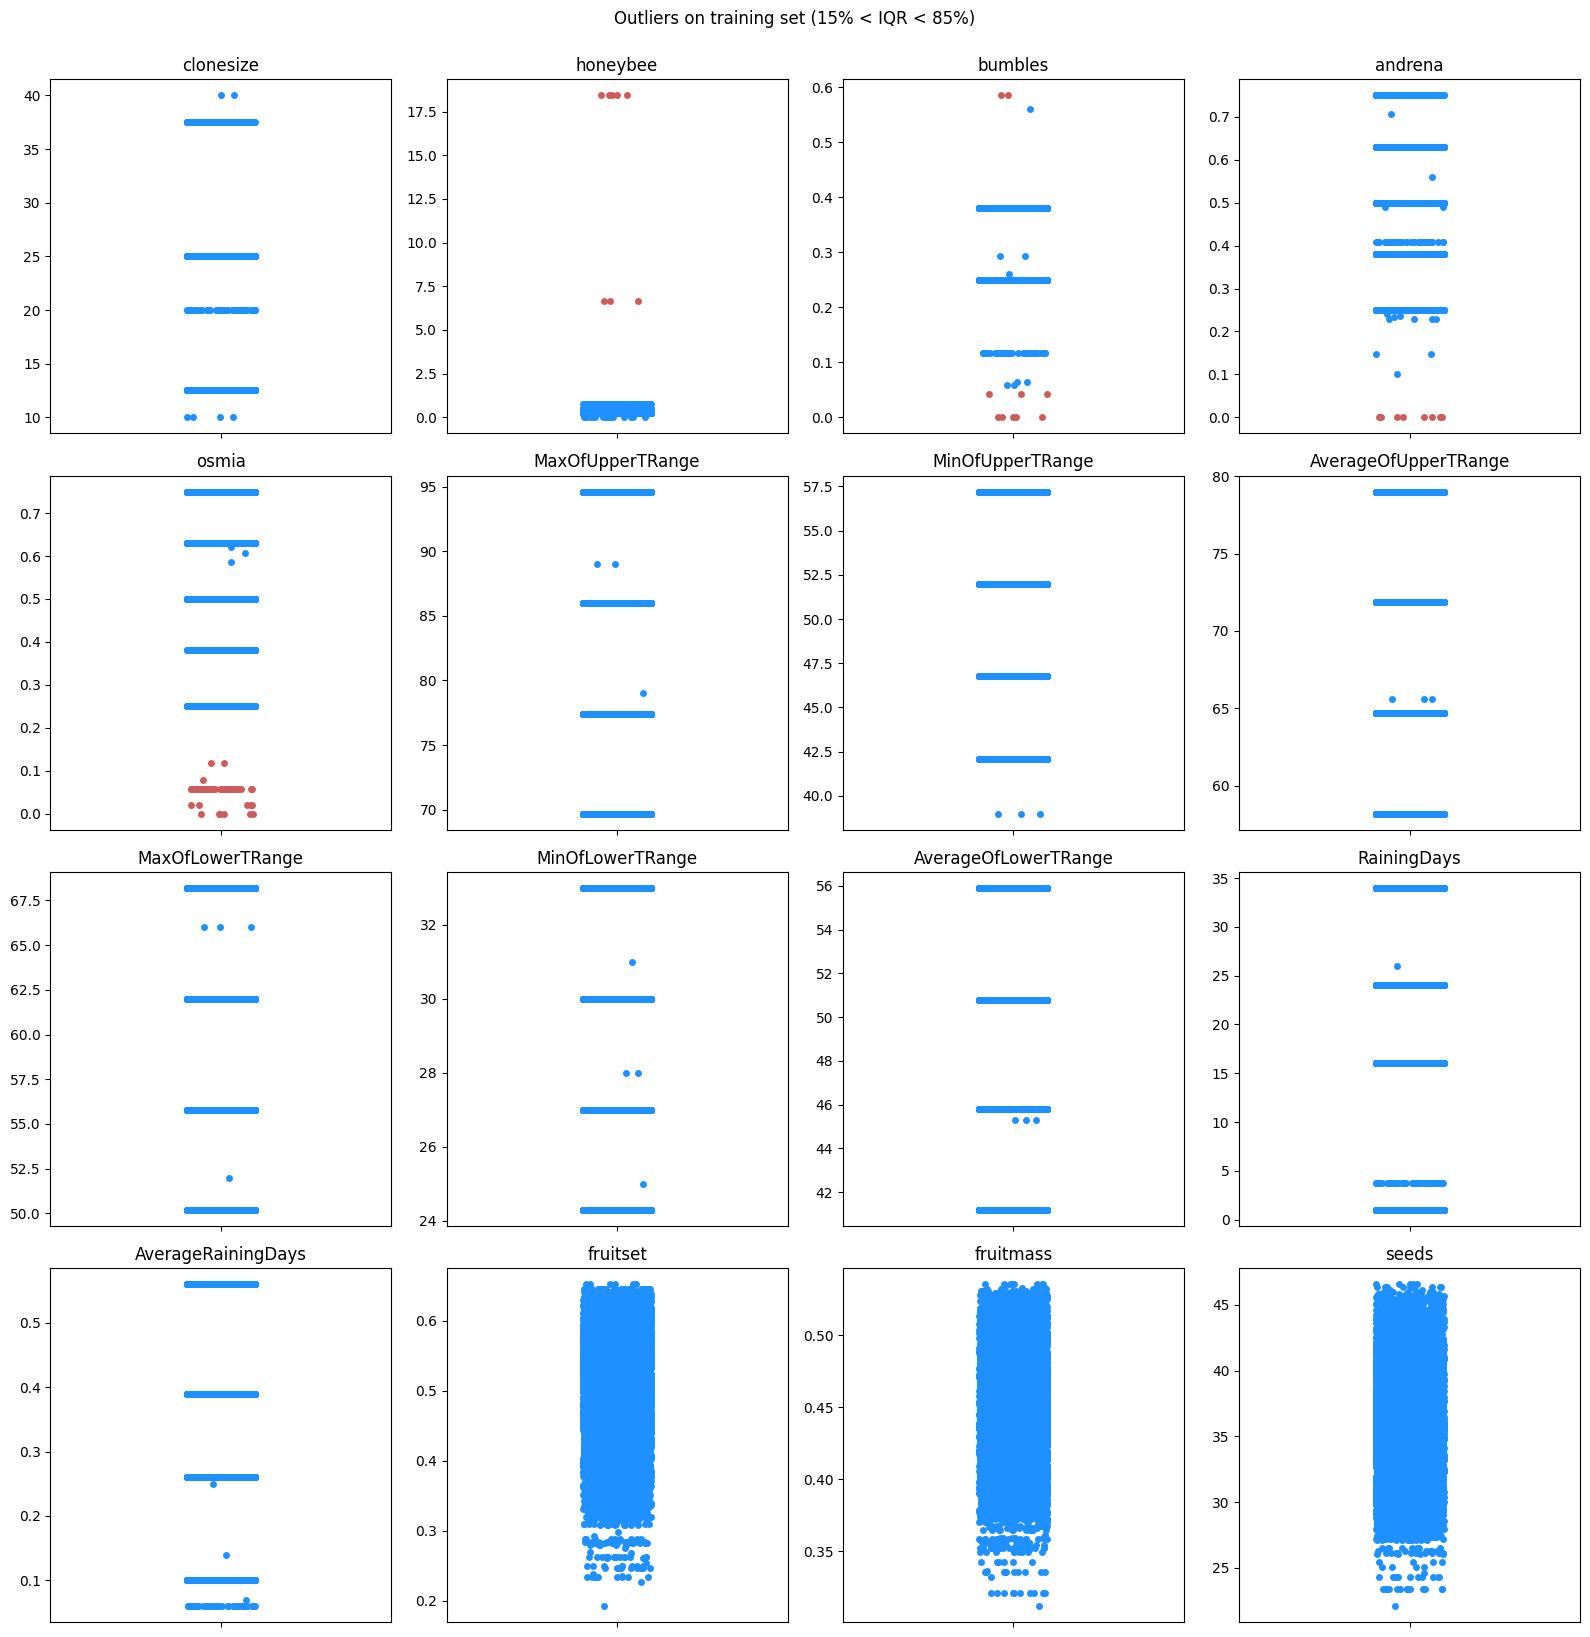

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    data = X[f]
    low, high = get_iqr_lh(data, l, h)
    sns.stripplot(data[(data >= low) & (data <= high)], ax=axes[i], color="dodgerblue")
    sns.stripplot(data[(data < low) | (data > high)], ax=axes[i], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.tight_layout()
plt.suptitle(f"Outliers on training set ({round(l*100)}% < IQR < {round(h*100)}%)", y=1.02)
plt.show()

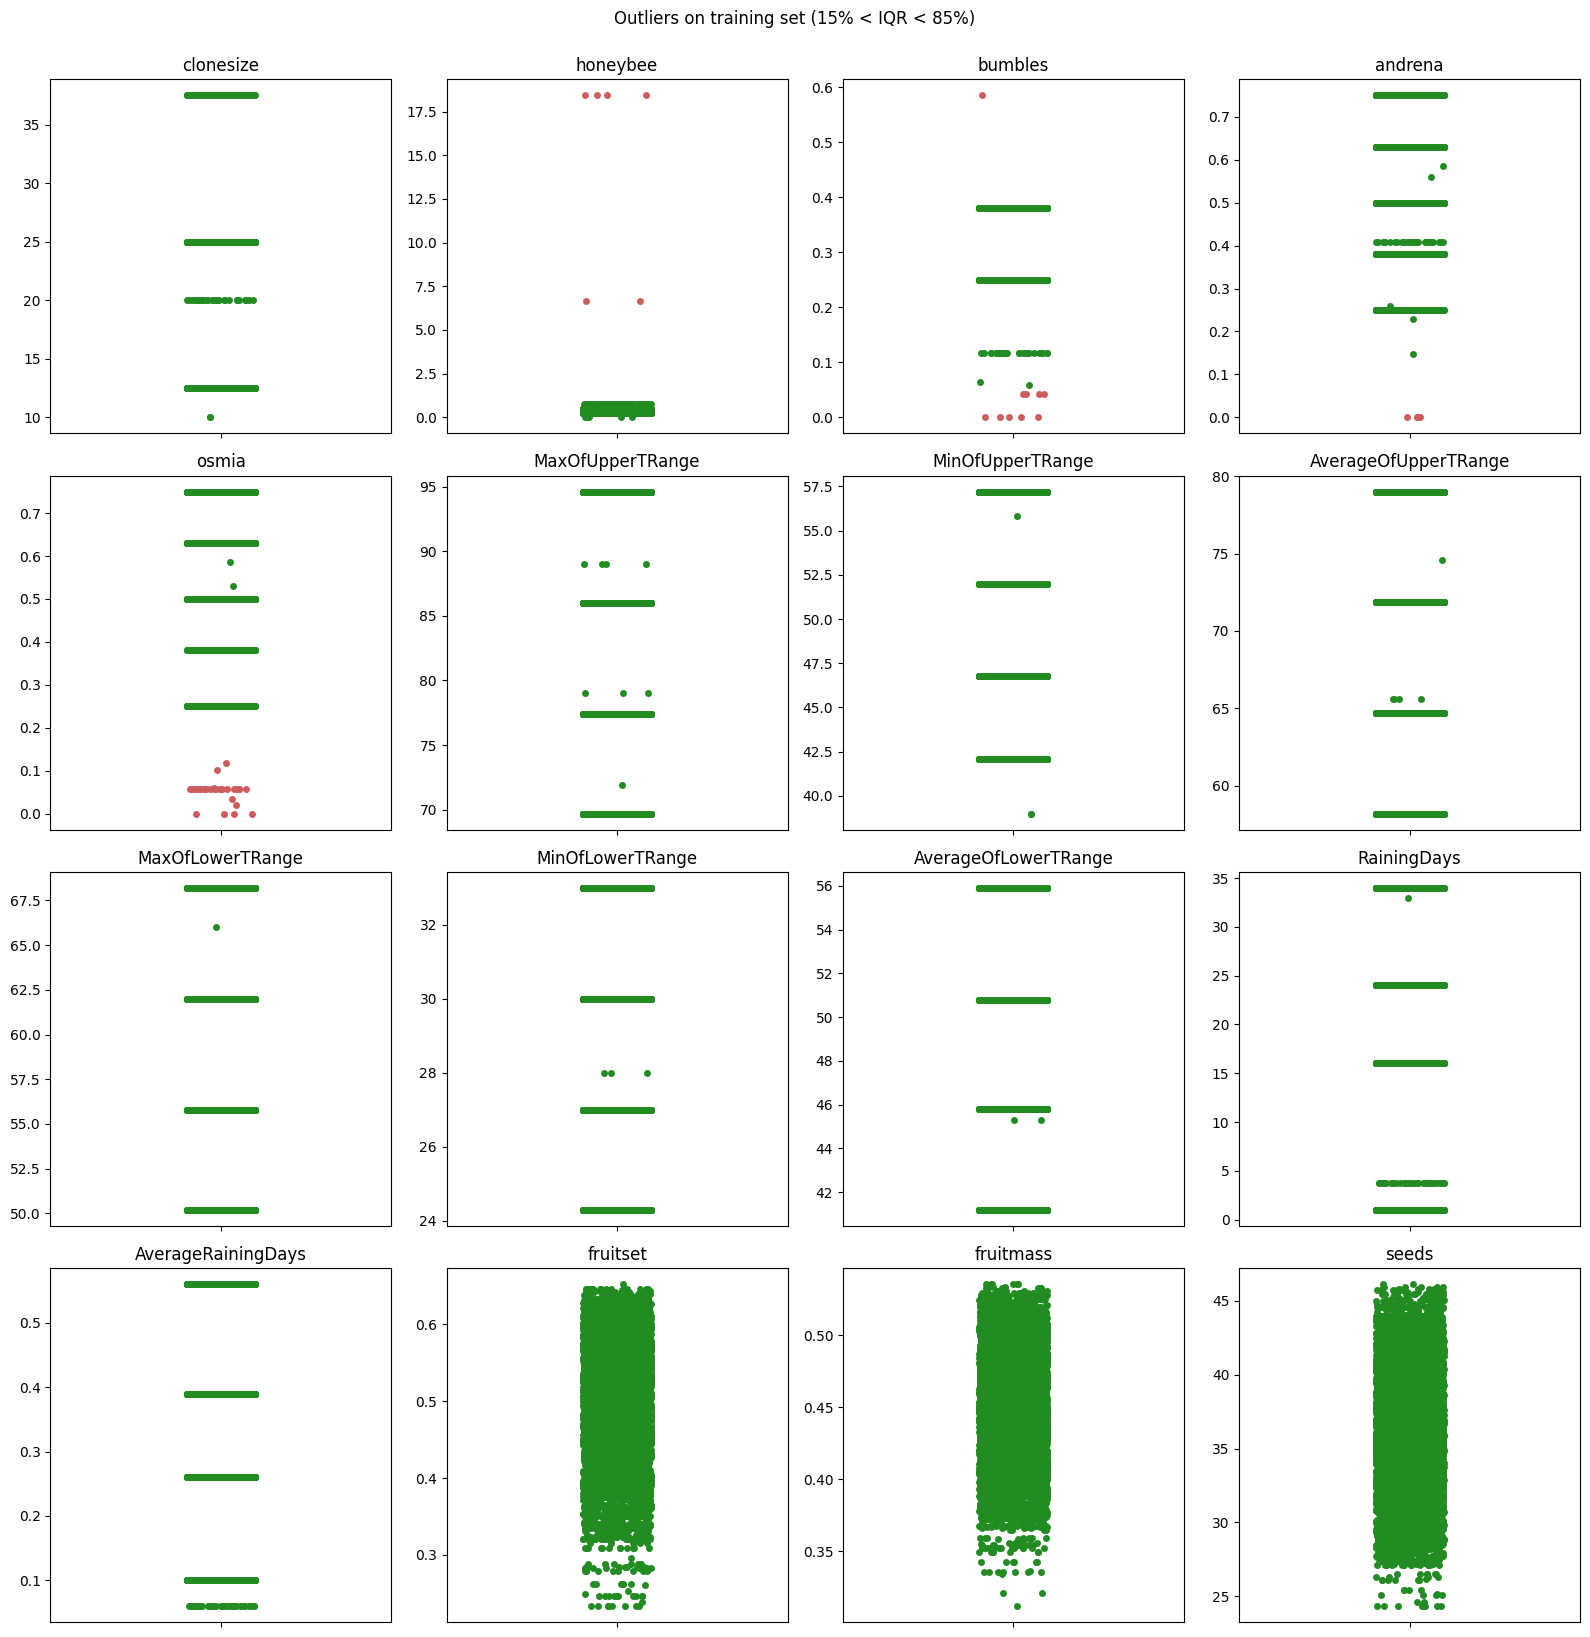

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, f in enumerate(features):
    data = X_test[f]
    low, high = get_iqr_lh(data, l, h)
    sns.stripplot(data[(data >= low) & (data <= high)], ax=axes[i], color="forestgreen")
    sns.stripplot(data[(data < low) | (data > high)], ax=axes[i], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
fig.tight_layout()
plt.suptitle(f"Outliers on training set ({round(l*100)}% < IQR < {round(h*100)}%)", y=1.02)
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> Outliers are similarly positioned for both of the cases so we have to me more cautious dealing with them.</div>

In [25]:
# making a list which falls outside higher and lower bounds
have_outlier = []

for f in features:
    low, high = get_iqr_lh(X[f], l, h)
    outliers = X[(X[f] < low) | (X[f] > high)][f]
    if not outliers.empty:
        have_outlier.append(f)

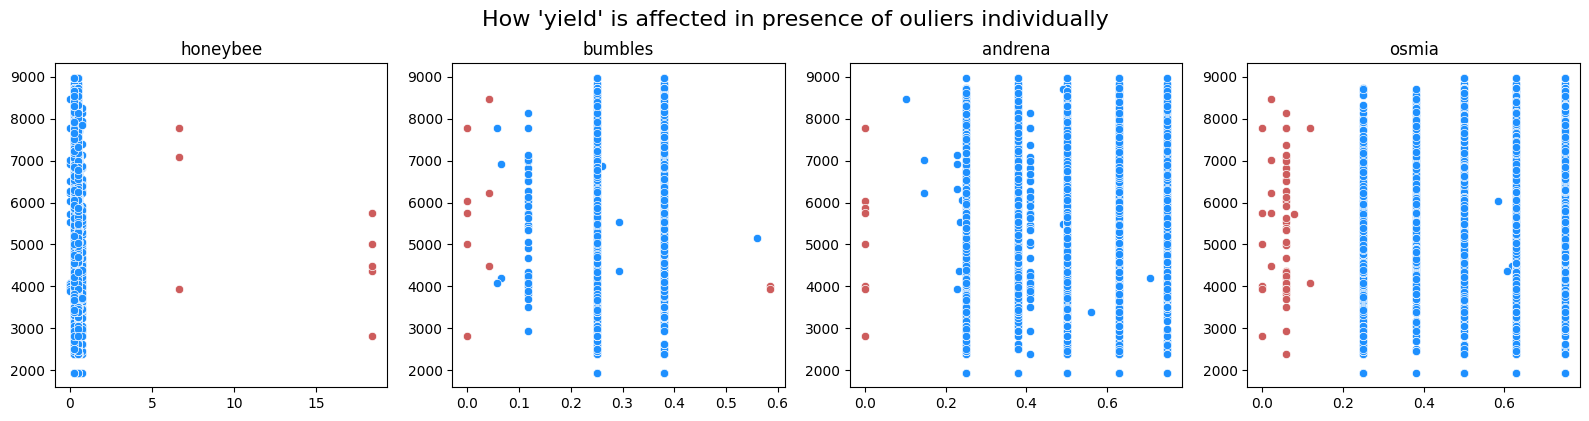

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=len(have_outlier), figsize=(16, 4))

for i, f in enumerate(have_outlier):
    x = X[f]
    low, high = get_iqr_lh(x, l, h)
    outlier_mask = (x < low) | (x > high)
    plt.subplot(1, len(have_outlier), i+1)
    sns.scatterplot(x=x[~outlier_mask], y=y[~outlier_mask], color="dodgerblue")
    sns.scatterplot(x=x[outlier_mask], y=y[outlier_mask], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.suptitle("How 'yield' is affected in presence of ouliers individually", fontsize=16, y=1.04)
plt.show()

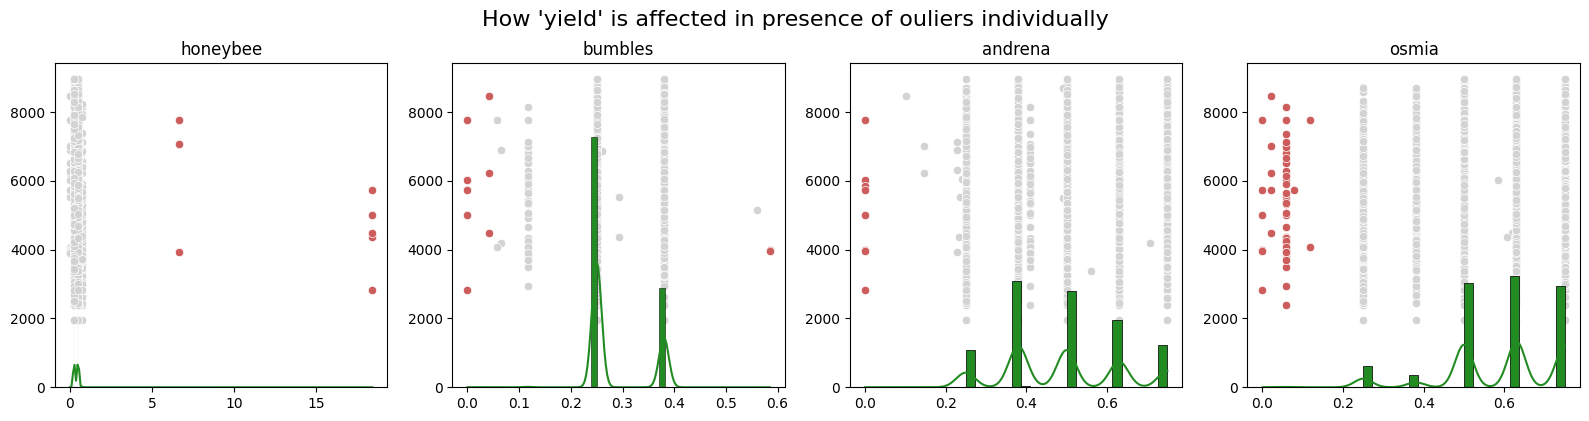

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=len(have_outlier), figsize=(16, 4))

for i, f in enumerate(have_outlier):
    x = X[f]
    low, high = get_iqr_lh(x, l, h)
    outlier_mask = (x < low) | (x > high)
    plt.subplot(1, len(have_outlier), i+1)
    sns.scatterplot(x=x[~outlier_mask], y=y[~outlier_mask], color="lightgray")
    sns.scatterplot(x=x[outlier_mask], y=y[outlier_mask], color="indianred")
    sns.histplot(x=X_test[f], color="forestgreen", alpha=1, kde=True)
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.suptitle("How 'yield' is affected in presence of ouliers individually", fontsize=16, y=1.04)
plt.show()

### Feature engineering

In [28]:
print([f'{_} - {(X[_] == 0).sum()}' for _ in have_outlier])

['honeybee - 16', 'bumbles - 5', 'andrena - 8', 'osmia - 6']


#### Removing outliers

In [29]:
def remove_outliers(df_x, df_y, columns, n_std=3):
    """
    Removes outliers from a dataframe based on a given number of standard deviations, and removes the corresponding rows
    from a separate dataframe containing the outcome variable y.

    Parameters:
    -----------
    df_x : pandas.DataFrame
        The first dataframe to remove outliers from.
    df_y : pandas.DataFrame
        The second dataframe containing the outcome variable y.
    columns : list
        A list of column names to remove outliers from.
    n_std : float
        The number of standard deviations to use for removing outliers.

    Returns:
    --------
    pandas.DataFrame
        A table containing the name of the feature and the number of rows removed for each column.
    """
    # Merge the dataframes based on a common index
    merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)

    # Remove outliers from the specified columns and track the number of rows removed for each column
    rows_removed = []
    for col in columns:
        mean = merged_df[col].mean()
        sd = merged_df[col].std()
        outlier_mask = merged_df[col] > mean + (n_std * sd)
        rows_removed.append((col, outlier_mask.sum()))

        merged_df = merged_df[~outlier_mask]

    # Remove the corresponding rows from the outcome variable dataframe
    df_y = df_y.loc[merged_df.index]

    # Return the cleaned dataframes and a table of the number of rows removed for each column
    return merged_df.iloc[:, :-1], df_y, pd.DataFrame(rows_removed, columns=["Feature", "Rows Removed"])

In [30]:
X, y, removed_stats = remove_outliers(X, y, have_outlier, n_std=3)

In [31]:
removed_stats

,Feature,Rows Removed
0,honeybee,8
1,bumbles,3
2,andrena,0
3,osmia,0


In [32]:
X.shape, y.shape

((15278, 16), (15278,))

#### Creating Log features

In [33]:
cols_to_transform = ['honeybee', 'bumbles', 'andrena', 'osmia']
for _ in cols_to_transform:
    X[f'log_{_}'] = X[_].apply(lambda x: np.log(0.01) if x == 0 else np.log(x))
    X_test[f'log_{_}'] = X_test[_].apply(lambda x: np.log(0.01) if x == 0 else np.log(x))

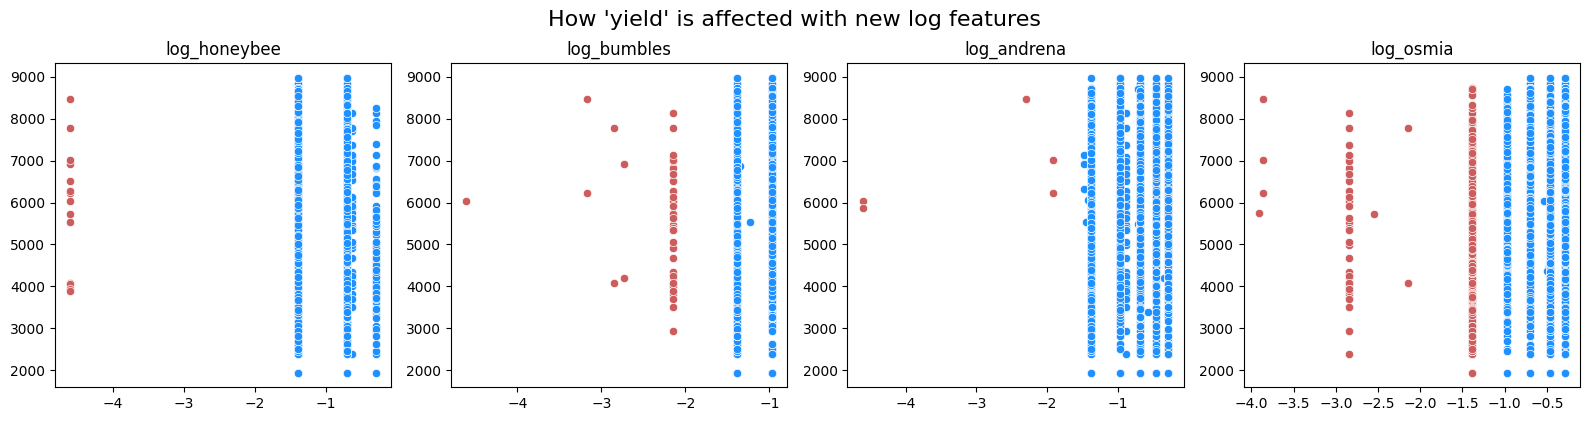

In [34]:
log_features = ['log_honeybee', 'log_bumbles', 'log_andrena', 'log_osmia']

fig, axes = plt.subplots(nrows=1, ncols=len(log_features), figsize=(16, 4))

for i, f in enumerate(log_features):
    x = X[f]
    low, high = get_iqr_lh(x, l, h)
    outlier_mask = (x < low) | (x > high)
    plt.subplot(1, len(have_outlier), i+1)
    sns.scatterplot(x=x[~outlier_mask], y=y[~outlier_mask], color="dodgerblue")
    sns.scatterplot(x=x[outlier_mask], y=y[outlier_mask], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.suptitle("How 'yield' is affected with new log features", fontsize=16, y=1.04)
plt.show()

> <div class="alert alert-block alert-info">
<b>Insight:</b> The idea behind is that if it works in a better way, then keep the log version, else won't consider.</div>

#### Creating additional features

In [35]:
X['PollinatorDiversity'] = X['honeybee'] + X['bumbles'] + X['andrena'] + X['osmia']
X_test['PollinatorDiversity'] = X_test['honeybee'] + X_test['bumbles'] + X_test['andrena'] + X_test['osmia']
X['TRangeDiff'] = X['AverageOfUpperTRange'] - X['AverageOfLowerTRange']
X_test['TRangeDiff'] = X_test['AverageOfUpperTRange'] - X_test['AverageOfLowerTRange']
X['RainIntensity'] = X['RainingDays'] / X['AverageRainingDays']
X_test['RainIntensity'] = X_test['RainingDays'] / X_test['AverageRainingDays']
X['FruitQuality'] = X['fruitset'] * X['fruitmass']
X_test['FruitQuality'] = X_test['fruitset'] * X_test['fruitmass']

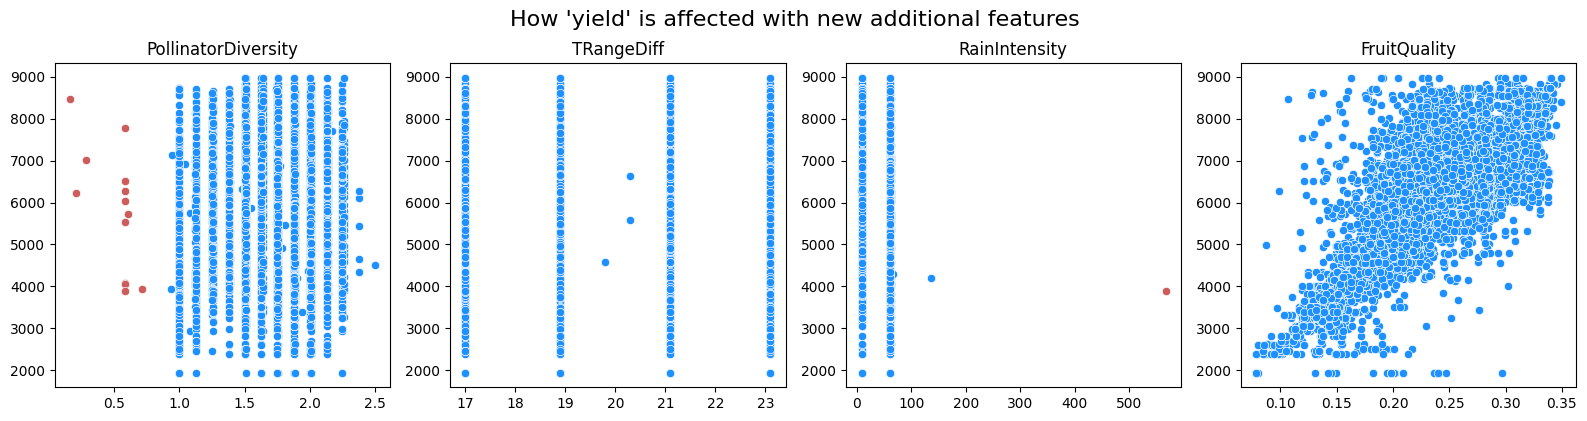

In [36]:
curated_features = ['PollinatorDiversity', 'TRangeDiff', 'RainIntensity', 'FruitQuality']

fig, axes = plt.subplots(nrows=1, ncols=len(curated_features), figsize=(16, 4))

for i, f in enumerate(curated_features):
    x = X[f]
    low, high = get_iqr_lh(x, l, h)
    outlier_mask = (x < low) | (x > high)
    plt.subplot(1, len(have_outlier), i+1)
    sns.scatterplot(x=x[~outlier_mask], y=y[~outlier_mask], color="dodgerblue")
    sns.scatterplot(x=x[outlier_mask], y=y[outlier_mask], color="indianred")
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.suptitle("How 'yield' is affected with new additional features", fontsize=16, y=1.04)
plt.show()

#### Checking correlation with new features vs. yield

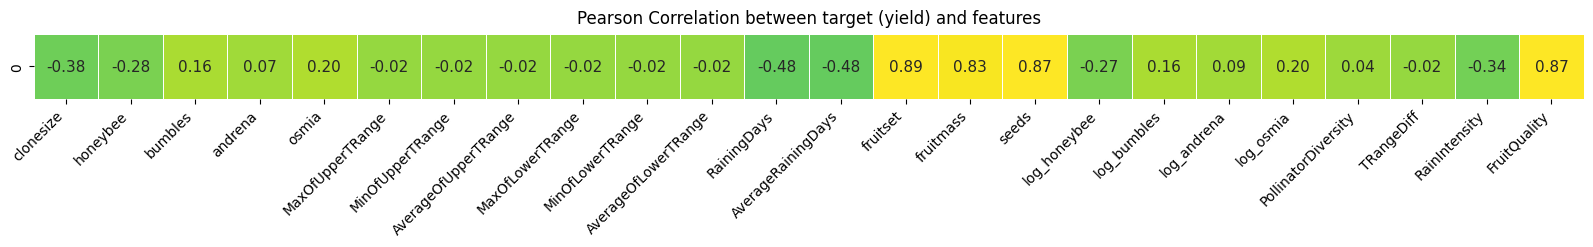

In [37]:
corr = X.corrwith(y)
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(pd.DataFrame(corr).T, cmap=plt.cm.viridis, center=-2, square=True, annot=True, annot_kws={"fontsize":11}, fmt='.2f', linewidths=0.5, cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Pearson Correlation between target (yield) and features", y=1.04)
plt.show()

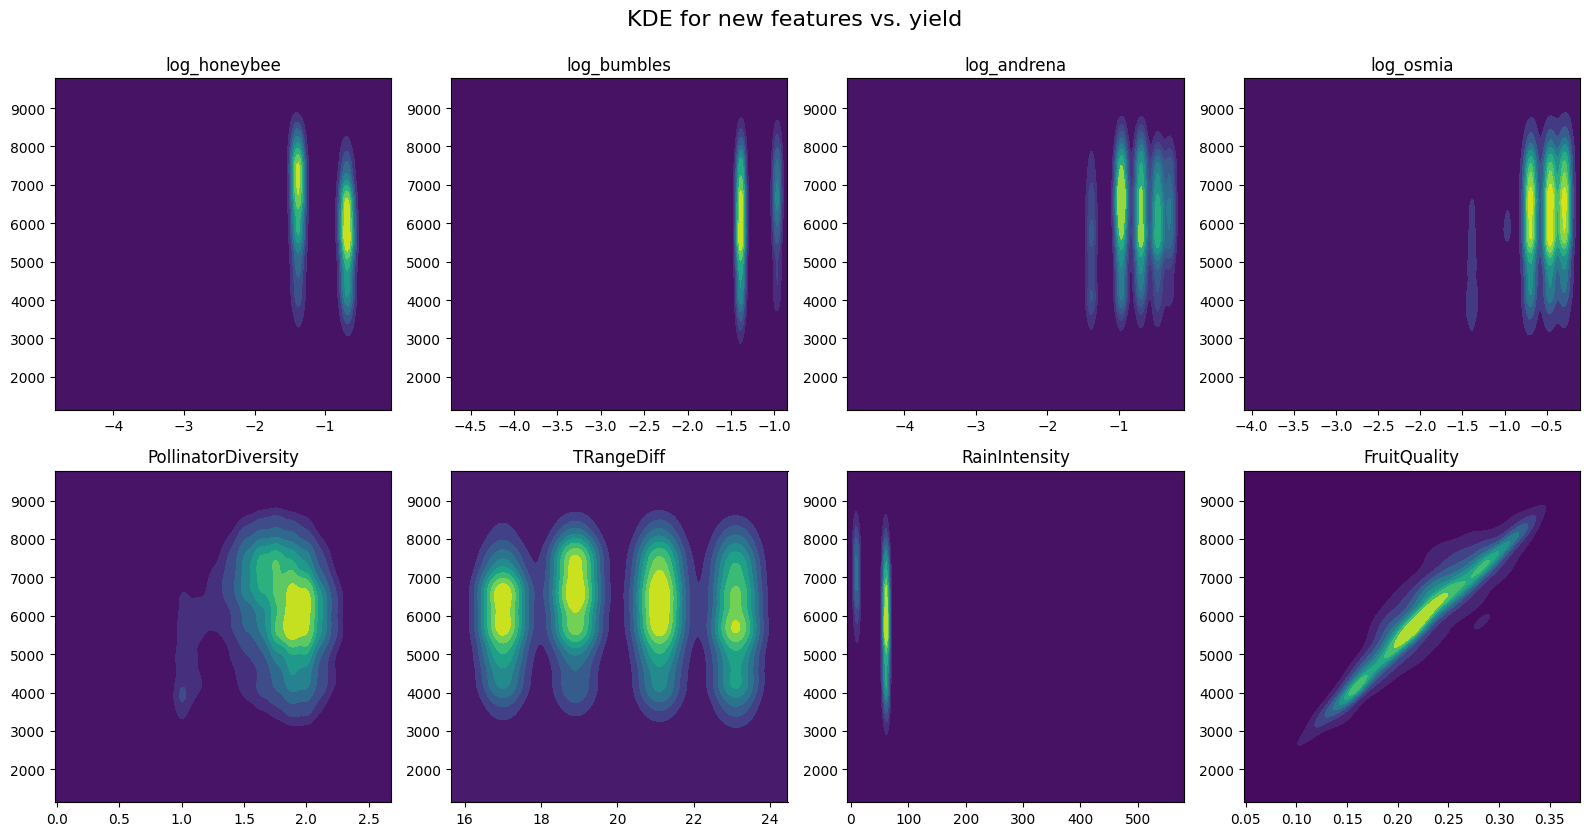

In [38]:
added_features = ['log_honeybee', 'log_bumbles', 'log_andrena', 'log_osmia', 'PollinatorDiversity', 'TRangeDiff', 'RainIntensity', 'FruitQuality']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, f in enumerate(added_features):
    sns.kdeplot(x=X[f], y=y, ax=axes[i], cmap=plt.cm.viridis, fill=True, thresh=0)
    axes[i].set_title(f)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout()
plt.suptitle("KDE for new features vs. yield", fontsize=16, y=1.04)
plt.show()

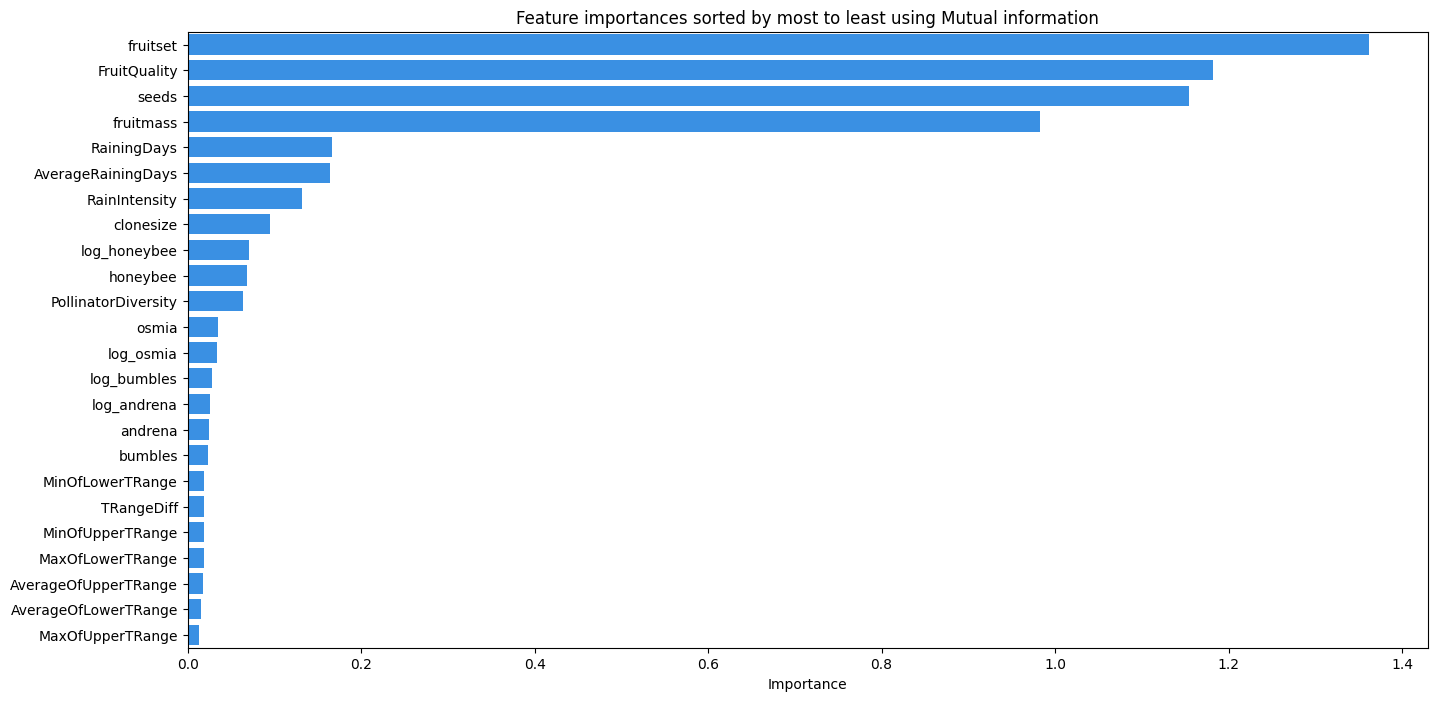

In [39]:
from sklearn.feature_selection import mutual_info_regression
n_iterations=3

importances=np.zeros((n_iterations, X.shape[1]))

for i in range(n_iterations):
    importances[i,:] = mutual_info_regression(X, y)

feat_importances = pd.Series(np.mean(importances, axis=0), index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x=feat_importances.values, y=feat_importances.index, color='dodgerblue')
plt.title('Feature importances sorted by most to least using Mutual information')
plt.xlabel('Importance')
plt.show()

In [40]:
X.to_csv("../output/X.csv", index=False)
y.to_csv("../output/y.csv", index=False)
X_test.to_csv("../output/X_test.csv", index=False)